In [1]:
import pandas as pd
import os

from harness.test_harness_class import TestHarness
from harness.th_model_instances.hamed_models.random_forest_regression import random_forest_regression
from harness.utils.names import Names
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering


import logging

l = logging.getLogger()
l.setLevel(logging.DEBUG)


In [2]:
print(os.getcwd())
df = pd.read_csv(os.path.join(os.getcwd(), '../resources/accuracy_set.csv'), index_col=0, dtype={'input' : object, 'output': object})
df['inc_time_2'].unique()
                 

/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/pysd2cat/notebooks


array([18., 15.,  8., 16., 10., 12.])

In [296]:
grna_df = pd.read_csv(os.path.join(os.getcwd(), '../resources/yg_grna.csv'))

grna2_df = pd.DataFrame()
grna2_df.loc[:, 'strain_name'] = grna_df['strain_name']
for i in range(1,11):
    grna2_df.loc[:, 'grna_r'+str(i)] = grna_df.apply(lambda x: 1 if x['e_r'+str(i)]!=x['o_r'+str(i)] else 0, axis=1)

df = df.merge(grna2_df, on='strain_name', how='left')
grna2_df


strain_name  grna_r1  grna_r2  grna_r3  grna_r4  grna_r5  grna_r6  grna_r7  grna_r8  grna_r9  grna_r10
0   https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1   0        0        0        0        1        0        0        0        0        0       
1   https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1   0        0        0        0        0        0        0        0        0        0       
2   https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1   1        0        1        0        0        0        0        0        0        0       
3   https://hub.sd2e.org/user/sd2e/design/UWBF_8545/1   0        0        0        0        1        0        0        0        0        0       
4   https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1  1        1        1        0        0        1        0        0        1        0       
5   https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1  1        1        1        0        0        1        0        0        1        0       
6   https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1  1        1        0        0        0        1        0        0        1        0       
7   https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1  1        1        1        0        0        1        0        0        1        0       
8   https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1   1        1        0        0        0        0        0        0        0        1       
9   https://hub.sd2e.org/user/sd2e/design/UWBF_6389/1   1        1        1        0        0        0        0        0        0        1       
10  https://hub.sd2e.org/user/sd2e/design/UWBF_6388/1   1        1        1        0        0        0        0        0        0        1       
11  https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1   1        1        0        0        0        1        0        0        0        1       
12  https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1   1        0        0        0        0        1        0        0        0        1       
13  https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1   1        1        0        0        0        1        0        0        0        1       
14  https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1   1        0        0        0        0        1        0        0        0        1       
15  https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1   0        0        0        0        1        0        0        0        0        0

In [14]:
drop_columns = ['Unnamed: 0', 'SynBioHub URI', 'Unnamed: 0.1', 'calibration_id', 'experiment_id', 'filename', 
                'glycerol_plate_index',  'growth_media_1', 'growth_media_2',  
                'inc_temp', 'inc_time_1', 'inc_time_2', 'input', 'lab', 'lab_id', 'media', 'od', 
                'od_cutoff', 'output', 'part_1_id', 'part_2_id', 'plate_id',  'replicate', 'source_container', 
                'strain_name', 'strain_circuit', 'well', 'post_well']
od_df = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv')).rename(columns={'strain' : 'strain_name'}).drop(columns=drop_columns)
#print(od_df['inc_time_2'].unique())
#print(df.columns.values)
df = df.merge(od_df, on='id', how='left')
#df


In [21]:
df['od'].value_counts()

0.000300    1908
0.000750    1468
0.000150    1335
0.000078    232 
0.000020    232 
0.000039    232 
0.002500    232 
0.000625    232 
0.005000    232 
0.001000    232 
0.000156    232 
0.000313    232 
0.001250    232 
0.002000    231 
0.000498    4   
0.000515    4   
0.000316    4   
0.579059    4   
0.000277    4   
0.208158    4   
0.601676    4   
0.167195    4   
0.000537    4   
0.083597    4   
0.255877    4   
0.000274    4   
0.177499    4   
0.511755    4   
0.000497    4   
0.000420    4   
           ..   
0.000401    3   
0.000362    3   
0.000298    3   
0.000416    3   
0.000348    3   
0.000471    3   
0.000250    3   
0.165320    3   
0.000219    3   
0.167491    3   
0.334982    3   
0.114148    3   
0.000384    3   
0.000393    3   
0.000403    3   
0.000357    3   
0.136698    3   
0.000335    3   
0.000357    3   
0.000256    3   
0.273397    3   
0.330640    3   
0.000411    3   
0.000347    3   
0.228297    3   
0.000856    3   
0.252639    3   
0.124627    3 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f7e6e10>,
      dtype=object)

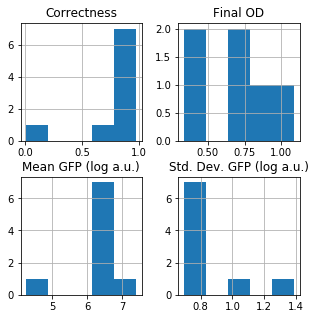

In [43]:
# Single Experiment Repeatability
sample = df.loc[df['media'] == 'SC Media'].loc[df['od'] == 0.0003].loc[df['inc_temp'] == 30].loc[df['gate'] == 'OR'].loc[df['input'] == '11'].loc[df['inc_time_2'] == 18]
sample = sample.rename(columns={'mean_correct_classifier_live': 'Correctness', 
                                'mean_log_gfp' : 'Mean GFP (log a.u.)',
                                'std_log_gfp' : 'Std. Dev. GFP (log a.u.)',
                                'post_od_raw' : "Final OD"
                               })
sample[['Correctness', 'Mean GFP (log a.u.)', 'Std. Dev. GFP (log a.u.)', 'Final OD']].hist(bins=5, figsize=(5,5))

In [52]:
import numpy as np
from scipy import stats
df.groupby(['gate', 'input'])['mean_correct_classifier_live'].agg([np.mean, stats.sem])

mean       sem
gate input                    
AND  00     0.957415  0.010058
     01     0.955107  0.008693
     10     0.955629  0.007981
     11     0.605430  0.015673
NAND 00     0.886915  0.012478
     01     0.872584  0.013302
     10     0.847593  0.014433
     11     0.358995  0.019936
NOR  00     0.920424  0.011061
     01     0.946959  0.007962
     10     0.960158  0.006517
     11     0.433450  0.022198
OR   00     0.970684  0.006333
     01     0.361809  0.013814
     10     0.032413  0.007931
     11     0.899071  0.012820
XNOR 00     0.777443  0.012476
     01     0.964262  0.006845
     10     0.937247  0.009242
     11     0.484541  0.013305
XOR  00     0.957963  0.007592
     01     0.239276  0.018140
     10     0.804667  0.010243
     11     0.876567  0.008058

In [333]:
print(df.columns)
for i, g in df.groupby(['inc_time_2', 'gate']):
    print(str(i) + " " + str(len(g)))


Index(['count', 'count_live', 'experiment_id', 'filename', 'gate', 'growth_media_1', 'growth_media_2', 'id', 'inc_temp', 'inc_time_1', 'inc_time_2', 'index', 'input', 'lab', 'lab_id', 'mean_correct_classifier', 'mean_correct_classifier_live', 'mean_correct_high_classifier', 'mean_correct_high_classifier_live', 'mean_correct_high_threshold', 'mean_correct_high_threshold_live', 'mean_correct_low_classifier', 'mean_correct_low_classifier_live', 'mean_correct_low_threshold', 'mean_correct_low_threshold_live', 'mean_correct_threshold', 'mean_correct_threshold_live', 'mean_log_gfp', 'mean_log_gfp_live', 'media', 'od', 'od_cutoff', 'output', 'plan', 'plate_id', 'replicate', 'source_container', 'std_correct_classifier', 'std_correct_classifier_live', 'std_correct_high_classifier', 'std_correct_high_classifier_live', 'std_correct_high_threshold', 'std_correct_high_threshold_live', 'std_correct_low_classifier', 'std_correct_low_classifier_live', 'std_correct_low_threshold', 'std_correct_low_thre

In [203]:
y_col = 'mean_correct_classifier_live'
correctness_cols = ['mean_correct_threshold', 'mean_correct_classifier', 'mean_correct_threshold_live', 
                    'std_correct_threshold_live','std_correct_classifier_live', 'std_correct_threshold',
                   'std_correct_classifier', ]
output_location = '.'
ignore_cols = ['filename', 'id', 'lab_id', 'plan', 'source_container', 'strain_name', 'plate_id']
ignore_cols.extend(correctness_cols)
description = 'foo'

data_df = df
#data_df = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '10')]

data_df = data_df.loc[(data_df['gate'] == 'OR') & \
                      (data_df['input']=='10') #& \
                      #(data_df['growth_media_1'] == 'standard_media') #& \
                     # (data_df['count_live'] >= 20000) 
                     ]
data_df = pd.get_dummies(data_df.drop(columns=ignore_cols)).dropna()
data_df = data_df.reset_index()




In [79]:

#data_df = data_df.dropna()

ss = StandardScaler()
ss.fit_transform(data_df)

standardized_data = ss.transform(data_df)

#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(standardized_data, nclust=5)
kmeans = pd.DataFrame(clust_labels)
#print(len(data_df))
#print(kmeans[0])
#data_df.insert((data_df.shape[1]),'kmeans',kmeans)
data_df.loc[:,'kmeans'] = kmeans[0]

In [80]:
data_df.loc[:, 'live_pr'] = data_df.apply(lambda x: x['count_live']/x['count'], axis=1)

Text(0, 0.5, 'mean_correct_classifier_live')

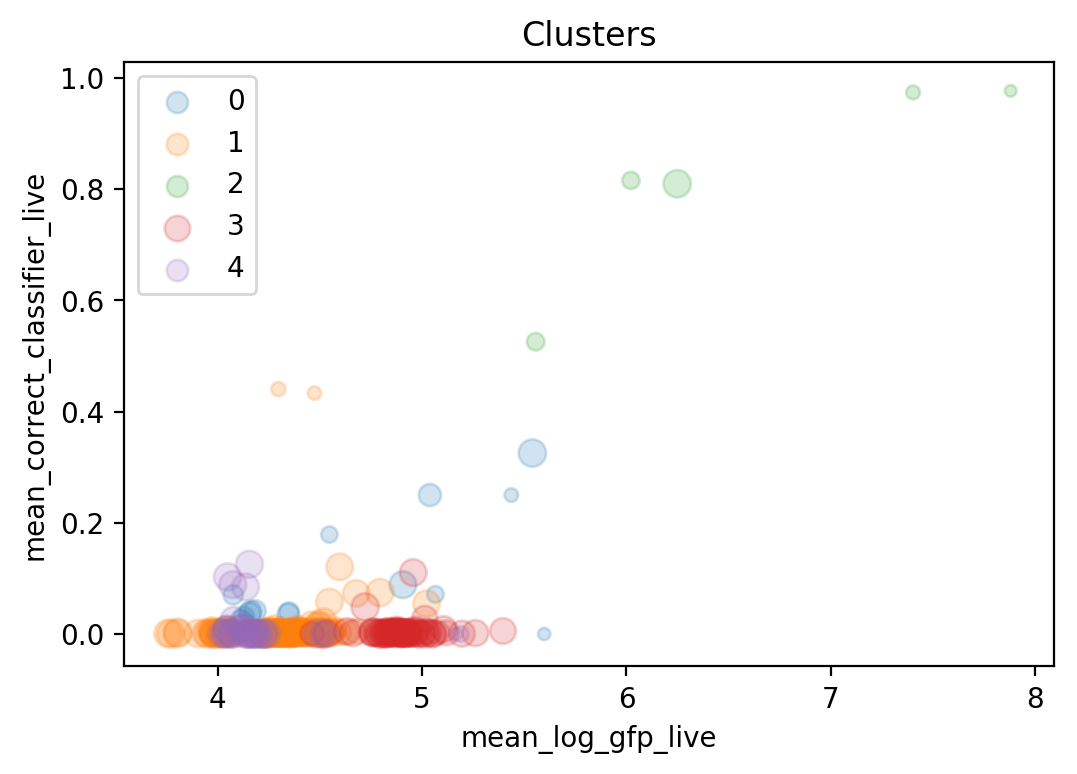

In [98]:
#Plot the clusters obtained using k means
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
xval='mean_log_gfp_live'
#sval=y_col

#xval = 'count_live'
#xval = 'std_log_gfp_live'
#xval = 'inc_time_2'
yval = y_col
#yval='od'
#xval='inc_temp'
sval='live_pr'
#sval='count_live'
#sval='od'
labels=data_df['kmeans'].unique()
labels.sort()
for label in labels:
    dat = data_df.loc[data_df['kmeans'] == label]
    scatter = ax.scatter(dat[xval],dat[yval],
                         label = label, alpha=0.2,
                         #c=kmeans[0] #, 
                         s=100*dat[sval]
                        )
plt.legend()
#ax.set_yscale('log')
ax.set_title('Clusters')
ax.set_xlabel(xval)
ax.set_ylabel(yval)
#plt.colorbar(scatter)

In [84]:
#print(len(data_df))
clusters = data_df.groupby('kmeans')
#clusters.get_group(0).describe() # long and low od
#clusters.get_group(1).describe() # med len and med od
diff = pd.DataFrame([clusters.get_group(0).describe().loc['mean',:], 
                     clusters.get_group(1).describe().loc['mean',:], 
                     clusters.get_group(2).describe().loc['mean',:], 
                     clusters.get_group(3).describe().loc['mean',:], 
                     clusters.get_group(4).describe().loc['mean',:]]).drop(columns=['level_0'])
#diff.loc['diff', :] = diff.apply(lambda x: x[0] - x[1], axis=0)
diff

count    count_live   inc_temp  inc_time_2         index  mean_correct_classifier_live  mean_correct_high_classifier  mean_correct_high_classifier_live  mean_correct_high_threshold  mean_correct_high_threshold_live  mean_correct_low_classifier  mean_correct_low_classifier_live  mean_correct_low_threshold  mean_correct_low_threshold_live  mean_log_gfp  mean_log_gfp_live        od  od_cutoff  replicate  std_correct_high_classifier  std_correct_high_classifier_live  std_correct_high_threshold  std_correct_high_threshold_live  std_correct_low_classifier  std_correct_low_classifier_live  std_correct_low_threshold  std_correct_low_threshold_live  std_log_gfp  std_log_gfp_live  threshold  threshold_live  e_r1  e_r2  e_r3  e_r4  e_r5  e_r6  e_r7  e_r8  e_r9  e_r10  o_r1  o_r2  o_r3  o_r4  o_r5  o_r6  o_r7  o_r8  o_r9  o_r10  gate_OR  growth_media_1_high_osm_media  growth_media_1_slow_media  growth_media_1_standard_media  growth_media_2_high_osm_media  growth_media_2_slow_media  growth_media_2_standard_media  inc_time_1_16:hour  inc_time_1_18:hour  input_10  lab_transcriptic  media_SC High Osm  media_SC Media  media_SC Slow  output_1.0   well_a1  well_a10   well_a2   well_a3   well_a5   well_a6   well_a7   well_a9   well_b1  well_b10  well_b11  well_b2   well_b3   well_b4   well_b5   well_b8   well_b9   well_c1   well_c3   well_c5   well_c6   well_c7   well_c8   well_d1  well_d10   well_d7   well_d8   well_e1  well_e10  well_e11   well_e2   well_e3   well_e4   well_e5   well_e7   well_e9   well_f1  well_f10  well_f11   well_f2   well_f4   well_f8  well_g1  well_g10  well_g11  well_g2   well_g3   well_g4   well_g6   well_g7   well_g8  well_h11   well_h2   well_h4   well_h5   well_h6   well_h8   well_h9  kmeans   live_pr
mean  238.625000    162.437500    31.750000  11.250000   9.198681e+04  0.093162                      0.278598                      0.093162                           0.303924                     0.555957                          0.721402                     0.906838                          0.696076                    0.444043                         4.624818      4.623616           0.000901  0.1        0.000000   0.407706                     0.245200                          0.023715                    0.067305                         0.407706                    0.245200                         0.036946                   0.060696                        1.180276     1.020136          5.306239   4.677267        0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0    1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0    1.0      0.000000                       0.25                       0.750000                       0.000000                       0.25                       0.750000                       0.000000            1.000000            1.0       1.0               0.000000           0.750000        0.25           1.0         0.062500  0.000000  0.000000  0.062500  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.062500  0.125    0.062500  0.000000  0.062500  0.000000  0.000000  0.062500  0.062500  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.062500  0.000000  0.0625   0.000000  0.000000  0.0625   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.542014
mean  19126.991935  16949.338710  30.000000  15.072581   1.081868e+06  0.012600                      0.014953                      0.012600                           0.100748                     0.064918                          0.985047                     0.987400                          0.899252                    0.935082                         4.387438      4.311741           0.001065  0.1        0.314516   0.094257                     0.060167                          0.001003                  

In [143]:
clusters.get_group(1).describe()

level_0         count    count_live    inc_temp  inc_time_2         index  mean_correct_classifier_live  mean_correct_high_classifier  mean_correct_high_classifier_live  mean_correct_high_threshold  mean_correct_high_threshold_live  mean_correct_low_classifier  mean_correct_low_classifier_live  mean_correct_low_threshold  mean_correct_low_threshold_live  mean_log_gfp  mean_log_gfp_live          od     od_cutoff   replicate  std_correct_high_classifier  std_correct_high_classifier_live  std_correct_high_threshold  std_correct_high_threshold_live  std_correct_low_classifier  std_correct_low_classifier_live  std_correct_low_threshold  std_correct_low_threshold_live  std_log_gfp  std_log_gfp_live   threshold  threshold_live  gate_NOR  growth_media_1_high_osm_media  growth_media_1_slow_media  growth_media_1_standard_media  growth_media_2_high_osm_media  growth_media_2_slow_media  growth_media_2_standard_media  inc_time_1_16:hour  inc_time_1_18:hour  input_11  lab_transcriptic  media_SC High Osm  media_SC Media  media_SC Slow  output_0.0     well_a1    well_a10    well_a11     well_a3     well_a6     well_a7     well_a9     well_b2     well_b3     well_b5     well_b6     well_b8     well_b9     well_c1    well_c11     well_c2     well_c3     well_c4     well_c6     well_c7     well_c9    well_d11     well_d2     well_d3     well_d4     well_d5     well_d6     well_d7     well_d9     well_e1    well_e11     well_e2     well_e4     well_e5     well_e6     well_e7     well_e8     well_e9     well_f1    well_f10    well_f11     well_f2     well_f3     well_f4     well_f5     well_f7     well_f9    well_g10    well_g11     well_g4     well_g5     well_g6     well_g8     well_h1    well_h10    well_h11     well_h2     well_h3     well_h4     well_h5     well_h6     well_h7     well_h8     well_h9  kmeans     live_pr
count  189.000000   189.000000    189.000000    189.000000  189.000000  1.890000e+02  189.000000                    189.000000                    189.000000                         189.000000                   189.000000                        189.000000                   189.000000                        189.000000                  189.000000                       189.000000    189.000000         189.000000  1.890000e+02  189.000000  189.000000                   189.000000                        189.000000                  189.000000                       189.000000                  189.000000                       189.000000                 189.000000                      189.000000   189.000000        189.000000  189.000000      189.0     189.000000                     189.000000                 189.000000                     189.000000                     189.000000                 189.000000                     189.0               189.0               189.0     189.0             189.000000         189.000000      189.000000     189.0       189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.000000  189.0   189.000000
mean   3419.761905  24989.878307  12632.486772  30.740741   15.730159   1.033951e+06  0.228939                      0.952097                      0.771061                           0.958110                     0.819777                          0.047903                     0.228939                          0.041890  

In [120]:
clusters.get_group(2).describe()

level_0         count    count_live    inc_temp  inc_time_2         index  mean_correct_classifier_live  mean_correct_high_classifier  mean_correct_high_classifier_live  mean_correct_high_threshold  mean_correct_high_threshold_live  mean_correct_low_classifier  mean_correct_low_classifier_live  mean_correct_low_threshold  mean_correct_low_threshold_live  mean_log_gfp  mean_log_gfp_live          od     od_cutoff   replicate  std_correct_high_classifier  std_correct_high_classifier_live  std_correct_high_threshold  std_correct_high_threshold_live  std_correct_low_classifier  std_correct_low_classifier_live  std_correct_low_threshold  std_correct_low_threshold_live  std_log_gfp  std_log_gfp_live   threshold  threshold_live  gate_NOR  growth_media_1_high_osm_media  growth_media_1_slow_media  growth_media_1_standard_media  growth_media_2_high_osm_media  growth_media_2_slow_media  growth_media_2_standard_media  inc_time_1_16:hour  inc_time_1_18:hour  input_11  lab_transcriptic  media_SC High Osm  media_SC Media  media_SC Slow  output_0.0     well_a1  well_a10    well_a11     well_a3     well_a6     well_a7     well_a9     well_b2     well_b3     well_b5     well_b6     well_b8     well_b9     well_c1  well_c11     well_c2     well_c3     well_c4     well_c6     well_c7     well_c9    well_d11     well_d2  well_d3     well_d4     well_d5     well_d6     well_d7     well_d9     well_e1    well_e11     well_e2  well_e4     well_e5     well_e6     well_e7  well_e8     well_e9     well_f1    well_f10    well_f11     well_f2     well_f3     well_f4     well_f5     well_f7     well_f9    well_g10    well_g11     well_g4     well_g5     well_g6     well_g8     well_h1    well_h10    well_h11     well_h2     well_h3     well_h4     well_h5     well_h6     well_h7     well_h8     well_h9  kmeans
count  170.000000   170.000000    170.000000    170.000000  170.000000  1.700000e+02  170.000000                    170.000000                    170.000000                         170.000000                   170.000000                        170.000000                   170.000000                        170.000000                  170.000000                       170.000000    170.000000         170.000000  1.700000e+02  170.000000  170.000000                   170.000000                        170.000000                  170.000000                       170.000000                  170.000000                       170.000000                 170.000000                      170.000000   170.000000        170.000000  170.000000      170.0     170.000000                     170.000000                 170.000000                     170.000000                     170.000000                 170.000000                     170.0               170.0               170.0     170.0             170.000000         170.000000      170.000000     170.0       170.000000  170.0     170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.0     170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.0    170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.0    170.000000  170.000000  170.000000  170.0    170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000  170.0 
mean   3301.235294  27545.994118  14023.952941  30.823529   16.476471   1.120655e+06  0.177178                      0.958725                      0.822822                           0.964680                     0.839622                          0.041275                     0.177178                          0.035320                    0.160378                        

In [23]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data_df.dropna(), 4)
agglomerative = pd.DataFrame(clust_labels1)
data_df.loc[:, 'agglomerative'] = agglomerative

ValueError: 'c' argument has 1566 elements, which is not acceptable for use with 'x' with size 3647, 'y' with size 3647.

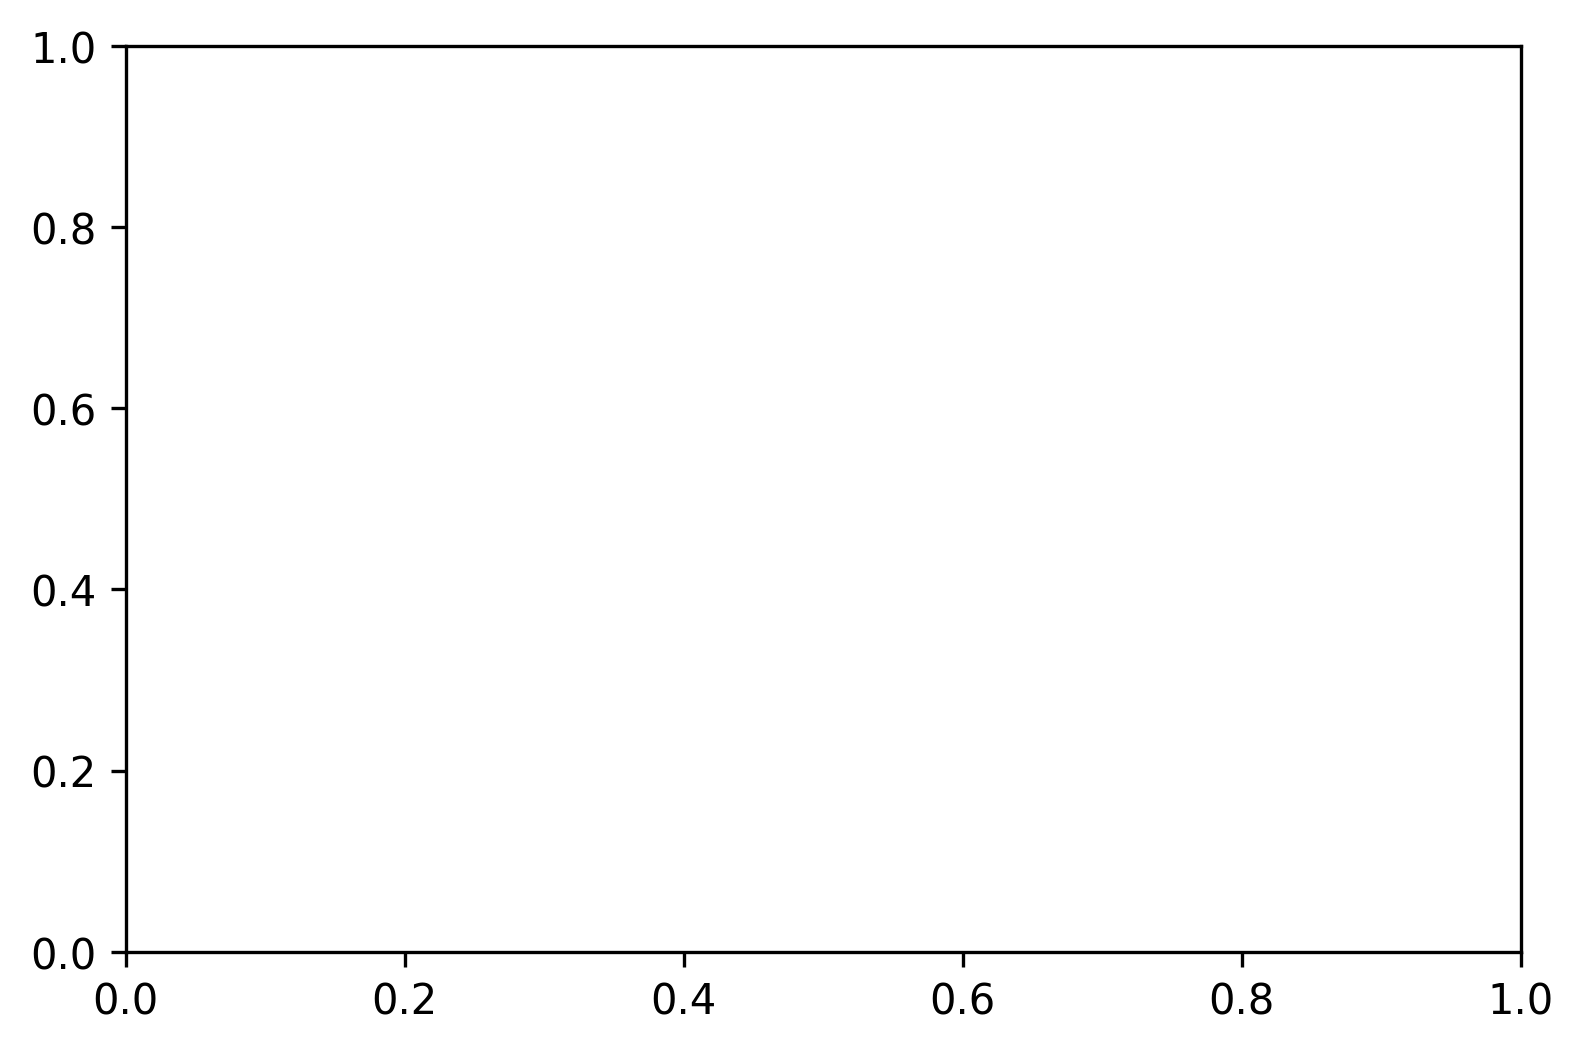

In [24]:
#Plot the clusters obtained using k means
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
scatter = ax.scatter(data_df['mean_log_gfp_live'],data_df[y_col],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('log GFP')
ax.set_ylabel('Correctness')
plt.colorbar(scatter)

In [20]:
df[['strain_name', 'gate', 'input']].drop_duplicates()

strain_name  gate input
0    https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1   OR    11  
1    https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1   OR    10  
2    https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1   XNOR  10  
3    https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1   XNOR  11  
4    https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1   NOR   11  
5    https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1   AND   11  
6    https://hub.sd2e.org/user/sd2e/design/UWBF_6389/1   NOR   10  
8    https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1   NOR   00  
9    https://hub.sd2e.org/user/sd2e/design/UWBF_6388/1   NOR   01  
10   https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1   XNOR  00  
20   https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1   AND   01  
21   https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1   AND   10  
24   https://hub.sd2e.org/user/sd2e/design/UWBF_8231/1   XNOR  01  
34   https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1   OR    00  
56   https://hub.sd2e.org/user/sd2e/design/UWBF_7376/1   AND   00  
69   https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1   OR    01  
88   https://hub.sd2e.org/user/sd2e/design/UWBF_8542/1   NAND  11  
92   https://hub.sd2e.org/user/sd2e/design/UWBF_8543/1   NAND  10  
96   https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1  XOR   10  
103  https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1  XOR   11  
104  https://hub.sd2e.org/user/sd2e/design/UWBF_8545/1   NAND  01  
105  https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1  XOR   01  
106  https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1  XOR   00  
121  https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1   NAND  00

In [478]:
y_col = 'mean_correct_classifier_live'
correctness_cols = ['mean_correct_threshold', 'mean_correct_classifier', 'mean_correct_threshold_live', 
                    'std_correct_threshold_live','std_correct_classifier_live', 'std_correct_threshold',
                   'std_correct_classifier', 'mean_correct_low_classifier_live', 'mean_correct_high_classifier_live',
                    'mean_correct_low_classifier', 'mean_correct_high_classifier', 
                    'mean_correct_low_threshold_live', 'mean_correct_high_threshold_live',
                    'mean_correct_low_threshold', 'mean_correct_high_threshold',
                   'std_correct_low_classifier_live', 'std_correct_high_classifier_live',
                    'std_correct_low_classifier', 'std_correct_high_classifier', 
                    'std_correct_low_threshold_live', 'std_correct_high_threshold_live',
                    'std_correct_low_threshold', 'std_correct_high_threshold']
output_location = '.'
#ignore_cols = ['filename', 'id', 'lab_id', 'plan', 'source_container', 'strain_name', 'plate_id']
ignore_cols = ['filename', 'id', 'lab_id', 'plan', 'source_container',   'output', 'plate_id',
              'experiment_id',
                'threshold_live', 'threshold',  'index', 'replicate', 'growth_media_1', 
               'inc_time_1','strain_name', 'pre_well',
               'well', 'od_cutoff', 'lab', 'input', 'gate'
              ]

output_cols = ['mean_log_gfp','mean_log_gfp_live', 'std_log_gfp', 
               'std_log_gfp_live', 'count', 'count_live', 'pre_od_raw', 'post_od_raw', 'pre_od_corrected', 
               'post_od_corrected', 'post_gfp_raw', 'pre_gfp_raw']
ignore_cols.extend(output_cols)

ignore_cols.extend(correctness_cols)
description = 'foo'

data_df = df
data_df = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '01')]
#data_df = data_df.loc[(data_df['gate'] == 'AND')]


data_df = pd.get_dummies(data_df.drop(columns=ignore_cols))#.dropna()
#data_df

In [479]:

#threshold = 5.5
#data_df = data_df.loc[((data_df['mean_log_gfp_live'] < threshold) & (data_df['output'].astype(int) == 1)) |
#             ((data_df['mean_log_gfp_live'] >= threshold) & (data_df['output'].astype(int) == 0))]

#print(data_df.columns.values)

input_cols = list(data_df.columns.values)
input_cols = [x for x in input_cols if x not in ignore_cols and x != y_col]
output_cols = [y_col]

l.debug("Splitting Test Harness Data ...")
train, test = train_test_split(data_df, #stratify=df[y_col],
                               test_size=0.2, random_state=5)
th = TestHarness(output_location=output_location)

data_df = data_df.copy()
data_df.loc[:, y_col] = data_df.index

l.debug("Running Test Harness ...")
#rf_classification_model = random_forest_classification(n_estimators=500)
th.run_custom(#test_harness_models=rf_classification_model,
              function_that_returns_TH_model=random_forest_regression,
              dict_of_function_parameters={},
                   training_data=train, 
                   testing_data=test,
                   data_and_split_description=description,
                   cols_to_predict=output_cols,
                   index_cols=input_cols+output_cols,
                   feature_cols_to_use=input_cols, 
                   normalize=True, 
                   feature_cols_to_normalize=input_cols,
                   feature_extraction=Names.RFPIMP_PERMUTATION,
                   predict_untested_data=False)



▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 12:29:08
Normalizing training and testing splits...
Starting Regression training...
Training time was: 0.67 seconds
Testing time was: 0.12 seconds
Starting Feature Extraction...
Feature Extraction time with method rfpimp_permutation was: 1.51 seconds

          Run ID        Date      Time Model Name Model Author  R-Squared   RMSE Samples In Train Samples In Test                                                                                                                     Model Description              Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized  Feature Extraction Was Untested Data Predicted
0  66EbABOwro3lO  2019-07-10  12:29:08  __init__   Hamed       -0.1        0.236  220              56              Random Forest: bootstrap=False, min_samples_leaf=1, n_estimators=689, min_samples_split=2, max_features=0

In [480]:
l.debug("Extracting Test Harness Predictions ...")
leader_board = pd.read_html(os.path.join(output_location, 'test_harness_results/custom_regression_leaderboard.html'))[0]
leader_board = leader_board.sort_values(by=['Date', 'Time'], ascending=True)
l.debug("Selecting run: " + str(leader_board.iloc[-1, :]))
run = leader_board.loc[:,'Run ID'].iloc[-1]
#print(run)
run_path = os.path.join(output_location, 'test_harness_results/runs/', "run_" + run)
features_path = os.path.join(run_path, 'feature_importances.csv')

features_df = pd.read_csv(features_path, index_col=None)
features_df.sort_values(by=['Importance'], ascending=False)

Feature  Importance
0   od                             0.204310  
1   inc_time_2                     0.026669  
2   glycerol_stock_02-05-2019-1    0.002827  
3   growth_media_2_high_osm_media -0.000558  
4   media_SC High Osm             -0.006425  
5   growth_media_2_slow_media     -0.048924  
6   media_SC Media                -0.050265  
7   inc_temp                      -0.073197  
8   media_SC Slow                 -0.111982  
9   growth_media_2_standard_media -0.115818  
10  glycerol_stock_08-30-2018-2   -0.120972  
11  glycerol_stock_08-30-2018-1   -0.122933

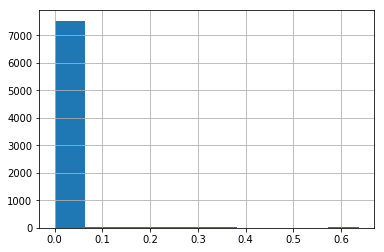

In [542]:
df['od'].hist()

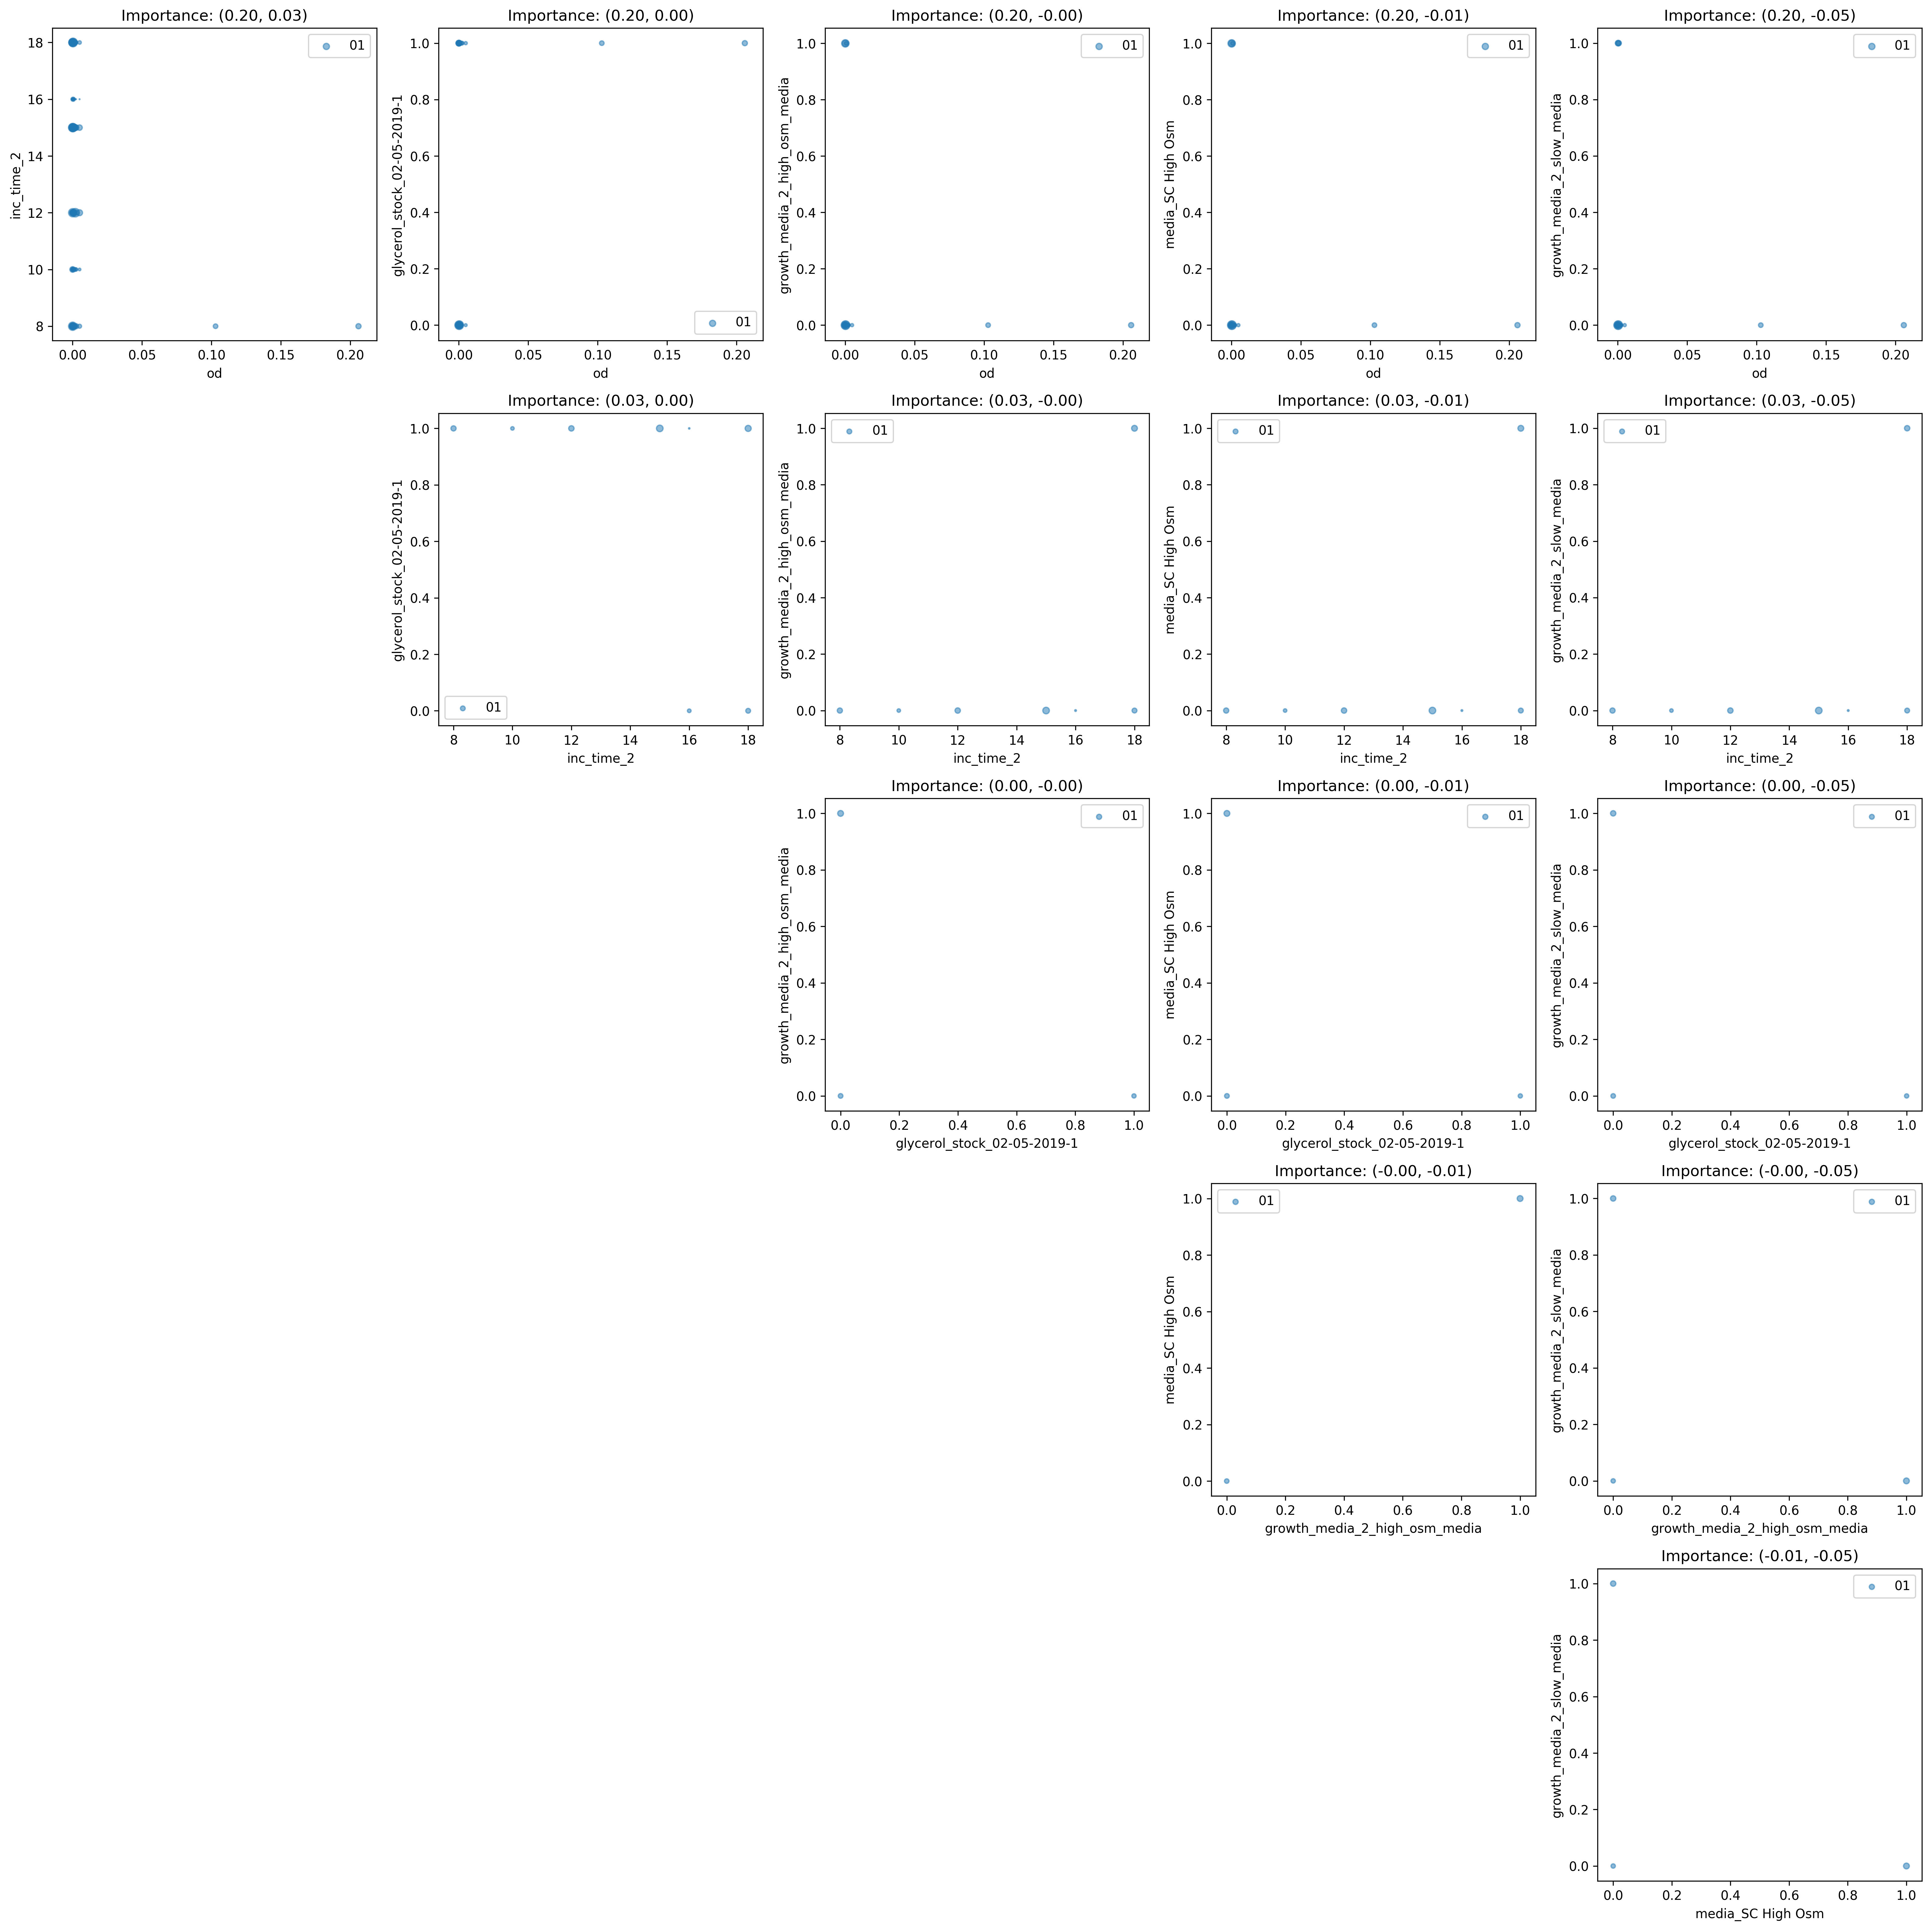

In [512]:
%matplotlib inline
#Plot the clusters obtained using k means
import matplotlib as mpl
import numpy as np

num_features = 5
fig = plt.figure(dpi=300,figsize=(5*num_features, 5*num_features))

#svals = ['count', 'post_od_raw', 'post_gfp_raw']
#size_adjs = [1/2000, 5, .0001]
svals = features_df.loc[0:num_features, :]['Feature'].values

#xval='mean_log_gfp_live'
data_df = df
data_df = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '01')]
#data_df = data_df.loc[(data_df['gate'] == 'AND') ]
data_df = pd.get_dummies(data_df)#.dropna()

yval = y_col

#plt.legend()

cmap = plt.cm.YlGn

#colors =data_df['input']
#print(data_df['mean_log_gfp_live'])
for i, sval1 in enumerate(svals):
    for j, sval2 in enumerate(svals):
        if j <= i:
            continue
        for inpt in ['00', '01', '10', '11']:
            if 'input_'+inpt not in data_df.columns:
                continue
                
            idf = data_df.loc[data_df['input_'+inpt] == 1]
        
            if len(idf) == 0:
                continue
        
            #size = 10* data_df[sval]/data_df[sval].mean()
    
            idf = idf.groupby([sval1, sval2])[yval].agg('mean').reset_index()

            ax = fig.add_subplot(len(svals), len(svals), i*len(svals)+j+1)
            scatter = ax.scatter(idf[sval1],idf[sval2],
                                      alpha=0.5,
                                 label=inpt,
                                     #c=kmeans[0] #, 
                                     s=100*idf[yval]*idf[yval],
                                     #c=colors,
                                     #cmap = cmap
                                )
            #fig.colorbar(scatter,ax=ax)
            #ax.set_yscale('log')
            importance1 = features_df.at[i, 'Importance']
            importance2 = features_df.at[j, 'Importance']
            title = 'Importance: ({importance1:.2f}, {importance2:.2f})'.format(importance1=importance1, importance2=importance2)
            ax.set_title(title)
            ax.set_xlabel(sval1)
            ax.set_ylabel(sval2)
            plt.legend()
    #    ax.set_xlim([2,9])
    #    ax.set_ylim([0,1])


plt.tight_layout()
#plt.colorbar(scatter)

In [568]:
[df[x].unique() for x in df.columns if 'media' in x]


[array(['standard_media', 'high_osm_media', 'slow_media'], dtype=object),
 array(['standard_media', 'high_osm_media', 'slow_media'], dtype=object),
 array(['SC Media', 'SC High Osm', 'SC Slow'], dtype=object)]

Text(0.5, 0, 'log OD')

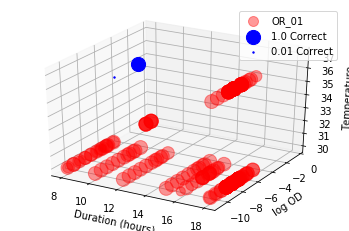

In [65]:
#OR01 grows best at lower OD for longer 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_df=df
idf = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '11')]
#print(idf.columns)
stocks = [x for x in idf.columns if 'growth_media_2' in x]
#print(stocks)
#idf=df.loc[df['inc_time_2'] == 8.0]
#idf=idf.loc[(idf['experiment_id'].str.contains('2019_07_01_14_23_28')) | (idf['experiment_id'].str.contains('2019_06_26_20_29_20'))]
sval1 = 'inc_time_2'
sval3 = 'inc_temp'
sval2 = 'od'
yval = 'mean_correct_classifier_live'
#yval = 'strain_name'
fig = plt.figure()
ax = ax = fig.gca(projection='3d') #plt.axes(projection='3d')
cmap = plt.cm.YlGn

idf=idf.groupby([sval1, sval2, sval3])[yval].agg([np.mean, np.std]).reset_index()
idf.loc[:,'od']=idf.apply(lambda x: np.log(x['od']), axis=1)
#print(idf)
#idf = idf.loc['lab_id']
#for ex in idf['experiment_id'].unique():
#    edf = idf.loc[idf['experiment_id'] == ex]
#    edf = edf.groupby([sval2,'strain_name'])[sval1].agg(np.mean).reset_index()
#for stock in stocks:
#    sdf = idf.loc[idf[stock] == 1.0]
sdf=idf
scatter = ax.scatter(sdf[sval1],sdf[sval2],sdf[sval3],
                          alpha=0.4,
                     #label=inpt,
                         #c=kmeans[0] #, 
#                         s=sdf['mean']*200,
                          s=sdf['mean']*200,
                         #c=idf['mean'],
                         c = 'red',
                         label='OR_01'
                         #cmap = cmap
                    )
ax.scatter([8], [-2], [35], label='1.0 Correct', s=200, c='blue')
ax.scatter([8], [-5], [35], label='0.01 Correct', s=2, c='blue')

#fig.subplot_adjust(right=0.2)
plt.legend()
ax.set_zlabel('Temperature')
ax.set_xlabel('Duration (hours)')
ax.set_ylabel('log OD')
#fig.colorbar(scatter,ax=ax)
#ax.set_xscale('log')
#ax.xaxis._set_scale('log')
#ax.set_ylim([8,18])
#ax.set_zlim([30,37])
#ax.set_xlim([1e-8,1e-3])
#ax.set_xscale('log')



#idf[['od', 'inc_time_2', 'mean_correct_classifier_live']]

Text(0.5, 1.0, 'Mean Correctness (size) of Samples')

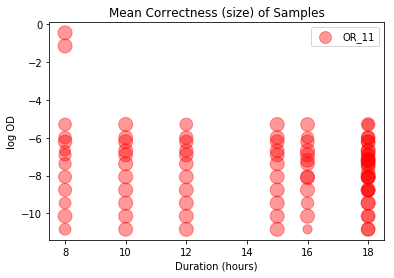

In [72]:
#OR01 grows best at lower OD for longer 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_df=df
idf = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '11')]
#print(idf.columns)
stocks = [x for x in idf.columns if 'growth_media_2' in x]
#print(stocks)
#idf=df.loc[df['inc_time_2'] == 8.0]
#idf=idf.loc[(idf['experiment_id'].str.contains('2019_07_01_14_23_28')) | (idf['experiment_id'].str.contains('2019_06_26_20_29_20'))]
sval1 = 'inc_time_2'
sval3 = 'inc_temp'
sval2 = 'od'
yval = 'mean_correct_classifier_live'
#yval = 'strain_name'
fig = plt.figure()
ax = plt.axes()
cmap = plt.cm.YlGn

idf=idf.groupby([sval1, sval2, sval3])[yval].agg([np.mean, np.std]).reset_index()
idf.loc[:,'od']=idf.apply(lambda x: np.log(x['od']), axis=1)
#print(idf)
#idf = idf.loc['lab_id']
#for ex in idf['experiment_id'].unique():
#    edf = idf.loc[idf['experiment_id'] == ex]
#    edf = edf.groupby([sval2,'strain_name'])[sval1].agg(np.mean).reset_index()
#for stock in stocks:
#    sdf = idf.loc[idf[stock] == 1.0]
sdf=idf
scatter = ax.scatter(sdf[sval1],sdf[sval2],
                          alpha=0.4,
                     #label=inpt,
                         #c=kmeans[0] #, 
#                         s=sdf['mean']*200,
                          s=sdf['mean']*200,
                         #c=idf['mean'],
                         c = 'red',
                         label='OR_11'
                         #cmap = cmap
                    )
#ax.scatter([8], [-2], [35], label='1.0 Correct', s=200, c='blue')
#ax.scatter([8], [-5], [35], label='0.01 Correct', s=2, c='blue')

#fig.subplot_adjust(right=0.2)
plt.legend()
#ax.set_zlabel('Temperature')
ax.set_xlabel('Duration (hours)')
ax.set_ylabel('log OD')
ax.set_title("Mean Correctness (size) of Samples")
#fig.colorbar(scatter,ax=ax)
#ax.set_xscale('log')
#ax.xaxis._set_scale('log')
#ax.set_ylim([8,18])
#ax.set_zlim([30,37])
#ax.set_xlim([1e-8,1e-3])
#ax.set_xscale('log')



#idf[['od', 'inc_time_2', 'mean_correct_classifier_live']]

['r1cwvvxz5d7wua_r1cx7ucsnkjfsb' 'r1dag7xpmgar9k_r1dakfqtk7hpzb'
 'r1cwvvwryt3q49_r1cx4ux3zcdt4w' 'r1d9xx8rjarjuw_r1da5tgwjasvw3'
 'r1cwvvvj2bh6hc_r1cx4pbeyv2q29' 'r1d6r59sste9m2_r1d8gf8cczkrz9'
 'r1d6r58jnct63g_r1d8kxz5ndkxyh' 'r1d6r5b24f9a9z_r1d8cyvjthnvvt']


[<matplotlib.lines.Line2D at 0x1a1ecc518>]

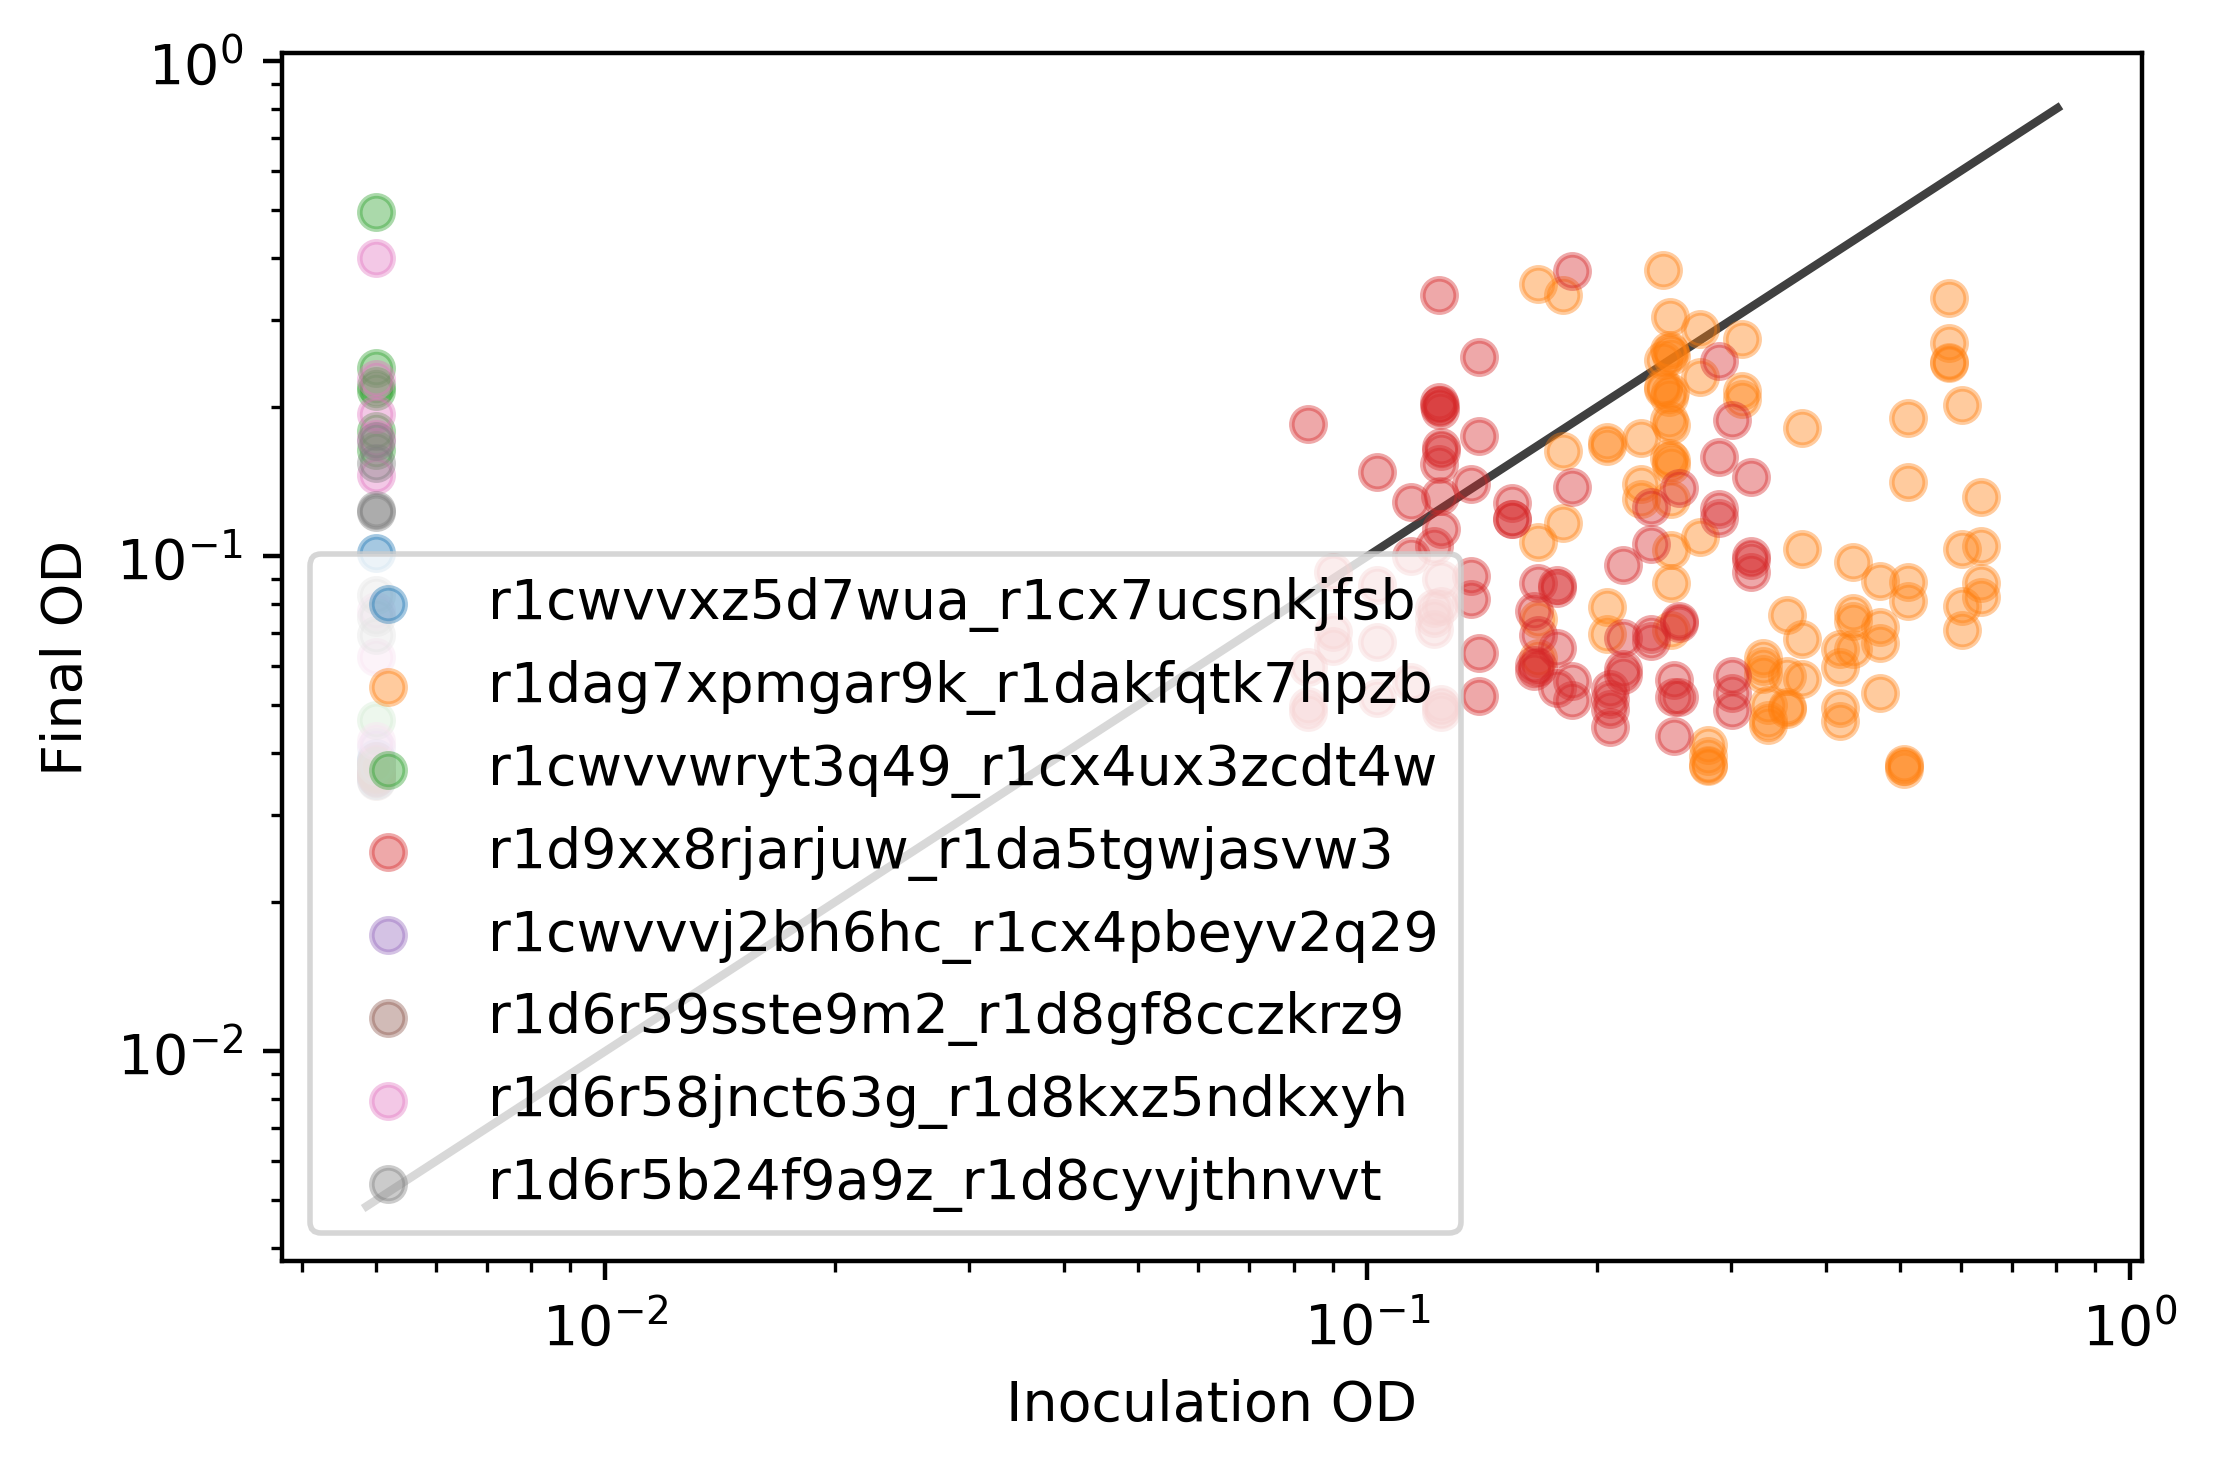

In [562]:
#OR01 grows best at lower OD for longer 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#data_df=df
#idf = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '01')]
#print(idf.columns)
#stocks = [x for x in idf.columns if 'growth_media_2' in x]
#print(stocks)
idf=df.loc[df['inc_time_2'] == 8.0]
#idf=idf.loc[(idf['experiment_id'].str.contains('2019_07_01_14_23_28')) | (idf['experiment_id'].str.contains('2019_06_26_20_29_20'))]
sval1 = 'od'
#sval3 = 'inc_temp'
sval2 = 'post_od_raw'
yval = 'mean_correct_classifier_live'
#yval = 'strain_name'
fig = plt.figure(dpi=400)
ax = plt.axes()
cmap = plt.cm.YlGn

#idf=idf.groupby([sval1, sval2, sval3])[yval].agg([np.mean, np.std]).reset_index()
#idf.loc[:,'od']=idf.apply(lambda x: np.log(x['od']), axis=1)
#print(idf)
#idf = idf.loc['lab_id']
print(idf['lab_id'].unique())
for ex in idf['lab_id'].unique():
    edf = idf.loc[idf['lab_id'] == ex]
    #edf = edf.groupby([ sval2,'strain_name'])[sval1].agg(np.mean).reset_index()
    
#for stock in stocks:
#    sdf = idf.loc[idf[stock] == 1.0]
#edf=idf
    scatter = ax.scatter(edf[sval1],edf[sval2],
                          alpha=0.4,
                         label=ex
                     #label=inpt,
                         #c=kmeans[0] #, 
#                         s=sdf['mean']*200,
                          #s=sdf['mean']*200,
                         #c=idf['mean'],
                         #c = 'red',
                         #label='OR_01'
                         #cmap = cmap
                    )
#ax.plot(1, 1)
#ax.scatter([8], [-2], [35], label='1.0 Correct', s=200, c='blue')
#ax.scatter([8], [-5], [35], label='0.01 Correct', s=2, c='blue')


plt.legend()
#ax.set_zlabel('Temperature')
ax.set_xlabel('Inoculation OD')
ax.set_ylabel('Final OD')
#fig.colorbar(scatter,ax=ax)
#ax.set_xscale('log')
#ax.xaxis._set_scale('log')
#ax.set_ylim([8,18])
#ax.set_zlim([30,37])
#ax.set_xlim([1e-8,1e-3])
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_aspect('equal')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)


#idf[['od', 'inc_time_2', 'mean_correct_classifier_live']]

NameError: name 'y_col' is not defined

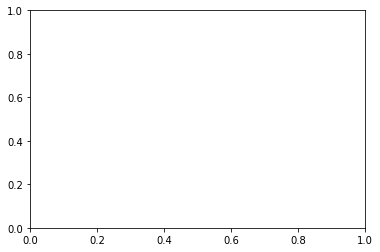

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

or_df=df.loc[df['gate'] == 'NOR']

ax.hist(or_df[y_col])
#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
#ax.legend()
plt.xlabel("Correctness")
plt.ylabel("# Samples")
plt.title("Correctness of Circuit (Classifier Live)")


Text(0.5, 1.0, 'Correctness of Circuit (Classifier Live)')

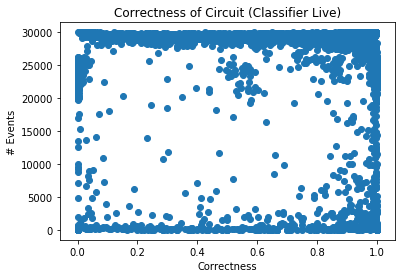

In [22]:
fig = plt.figure()
ax = plt.axes()

#or_df=df.loc[df['gate'] == 'OR']

ax.scatter(df[y_col], df['count'])
#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
#ax.legend()
plt.xlabel("Correctness")
plt.ylabel("# Events")
plt.title("Correctness of Circuit (Classifier Live)")



In [65]:
df[y_col].unique()

array([0.9015396 , 0.01558926, 0.95027555, ..., 0.8576257 , 0.85965642,
       0.36420966])

In [170]:
#df.loc[(df['gate'] == 'OR') & (df['output'] == '11') ]
import numpy as np
bins= np.arange(0, 0.01, 0.0001)
odg = np.digitize(mdf['od'], bins)

mdf=df.loc[(df['gate'] == 'NOR') & (df['input'] == '11') ]

print(mdf.loc[(mdf[y_col] >= 0.5) & (mdf['inc_time_2'] == 18.0)]['media'].value_counts())
mdf.loc[(mdf[y_col] < 0.5) & (mdf['inc_time_2'] == 18.0)]['media'].value_counts()

SC Media       76
SC Slow        15
SC High Osm    12
Name: media, dtype: int64


SC Media       92
SC High Osm    12
SC Slow        10
Name: media, dtype: int64

Text(0.5, 1.0, "Correctness by ['lab_id']")

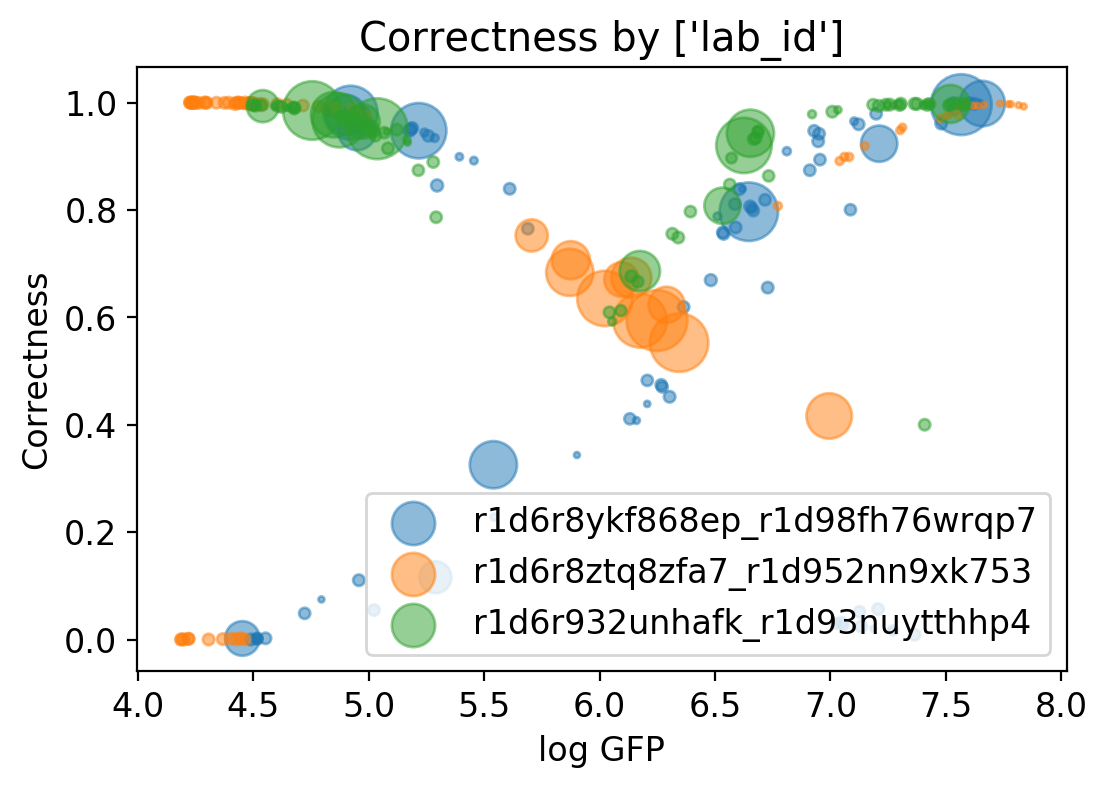

In [8]:
fig = plt.figure(dpi=200)
ax = plt.axes()



size='std_log_gfp_live'
scale=15
#size='count_live'
#scale = 2.0

mdf=df.loc[df['inc_time_2'] == 12]

mdf.loc[:,'size'] = mdf.apply(lambda x: scale**x[size], axis=1)

grouping=['lab_id']
plt.rcParams['font.size'] = 12
groups = mdf.groupby(grouping)

for i, group in groups:
    ax.scatter(group['mean_log_gfp_live'],group['mean_correct_classifier_live'], label=i, alpha=0.5, s=mdf['size'])
#ax.scatter(mdf['mean_log_gfp_live'],mdf['mean_correct_high_classifier_live'], label="High Output", alpha=0.1, s=mdf['size'])
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by " + str(grouping))

Text(0.5, 1.0, "Correctness by ['media']")

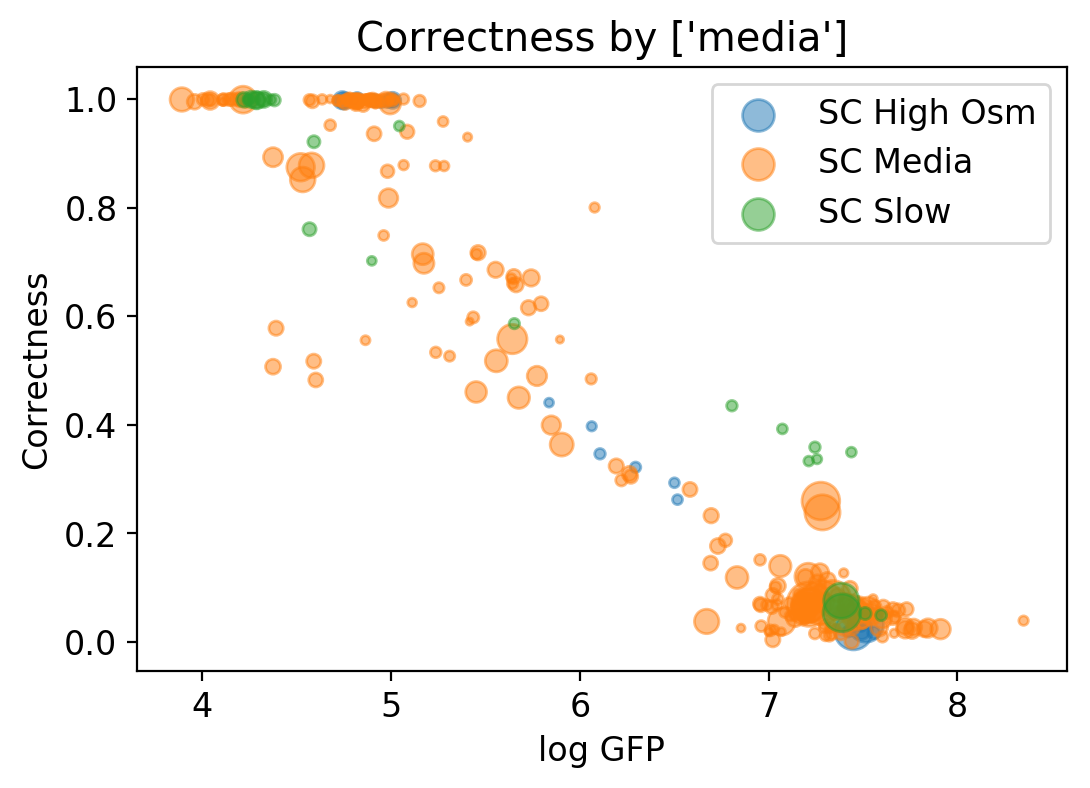

In [169]:
fig = plt.figure(dpi=200)
ax = plt.axes()



size='std_log_gfp_live'
scale=15
#size='count_live'
#scale = 2.0

mdf.loc[:,'size'] = mdf.apply(lambda x: scale**x[size], axis=1)

grouping=['media']
plt.rcParams['font.size'] = 12
groups = mdf.groupby(grouping)

for i, group in groups:
    ax.scatter(group['mean_log_gfp_live'],group['mean_correct_classifier_live'], label=i, alpha=0.5, s=mdf['size'])
#ax.scatter(mdf['mean_log_gfp_live'],mdf['mean_correct_high_classifier_live'], label="High Output", alpha=0.1, s=mdf['size'])
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by " + str(grouping))

In [8]:
for i in range(1,11):
    df.loc[:, 'd_r'+str(i)] = df['e_r'+str(i)] - df['o_r'+str(i)]
df

count  count_live                                                                                                                                        filename  gate  growth_media_1  growth_media_2                         id  inc_temp inc_time_1  inc_time_2    index input           lab                       lab_id  mean_correct_classifier  mean_correct_classifier_live  mean_correct_threshold  mean_correct_threshold_live  mean_log_gfp  mean_log_gfp_live     media        od  od_cutoff  output                 plan  plate_id  replicate source_container  std_correct_classifier  std_correct_classifier_live  std_correct_threshold  std_correct_threshold_live  std_log_gfp  std_log_gfp_live                                         strain_name  threshold  threshold_live well  e_r1  e_r2  e_r3  e_r4  e_r5  e_r6  e_r7  e_r8  e_r9  e_r10  o_r1  o_r2  o_r3  o_r4  o_r5  o_r6  o_r7  o_r8  o_r9  o_r10  d_r1  d_r2  d_r3  d_r4  d_r5  d_r6  d_r7  d_r8  d_r9  d_r10
0     29906.0  18901.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_A1.fcs  OR    standard_media  standard_media  2018_12_03_22_57_54_1_A1   30.0      18:hour    18.0        0        11    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.973300                 0.966851                      0.921387                0.901540                     6.770841      6.910869           SC Media  0.000750  0.1        1       2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.161208                0.179029                     0.001556               0.002167                    1.020506     0.966403          https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1   5.421515   5.587442        a1   0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0    1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   -1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  -1.0  
1     22004.0  21425.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_B1.fcs  OR    standard_media  standard_media  2018_12_03_22_57_54_1_B1   30.0      18:hour    18.0        30000    10    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.002367                 0.000921                      0.035085                0.015589                     3.921465      3.904025           SC Media  0.000750  0.1        1       2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.048592                0.030342                     0.001240               0.000846                    1.048261     1.036942          https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1   5.421515   5.587442        b1   0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0    1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   -1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  -1.0  
2     24725.0  23952.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_C1.fcs  XNOR  standard_media  standard_media  2018_12_03_22_57_54_1_C1   30.0      18:hour    18.0        60000    10    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.981167                 0.980791                      0.917654                0.950276                     4.209854      4.186770           SC Media  0.000750  0.1        0       2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.135938                0.137261                     0.001748               0.001405                    1.037666     1.023284          https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1   5.421515   5.587442        c1  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     29757.0  18697.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-Ye

Text(0.5, 1.0, 'Unexpected gRNA presence/absence')

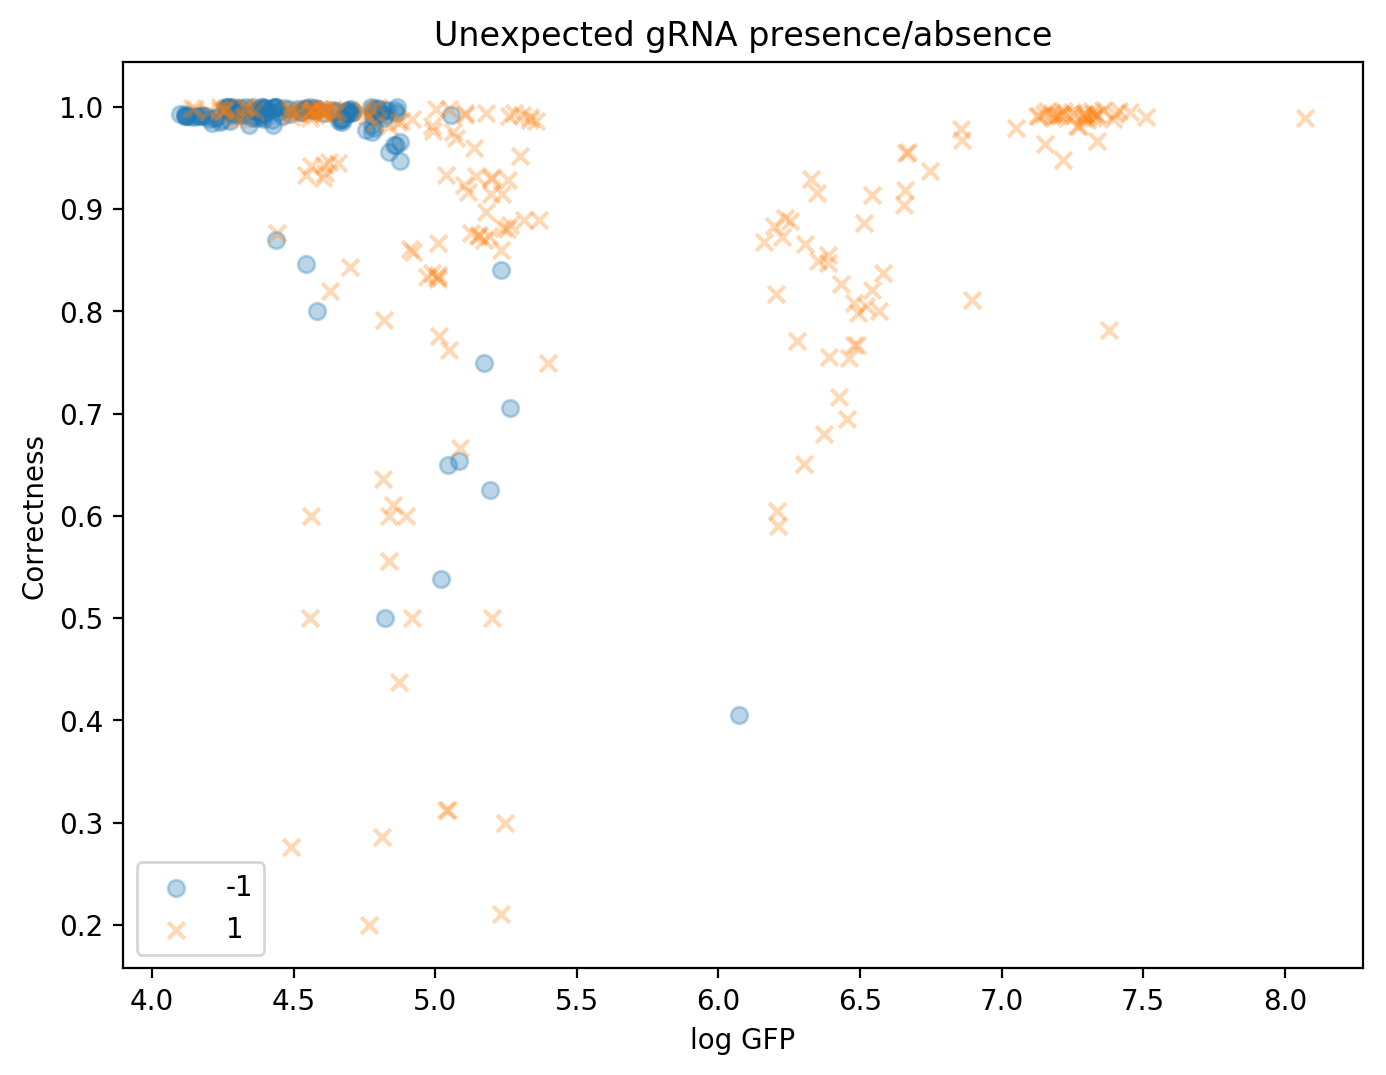

In [15]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = plt.axes()

correctness='mean_correct_classifier_live'

markers = {
    -1 : 'o',
    1 : 'x'
}

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
mdf=df.dropna()
#mdf.loc[:,'marker'] = mdf.apply(get_marker,axis=1)
gate='OR'
r='r2'
#mdf = mdf.loc[(mdf['count_live'] > 0) &(mdf['gate'] == gate) ].dropna()
mdf = mdf.loc[(mdf['count_live'] > 0) ].dropna()
#mdf = df.loc[df['e_r3'].astype(int) == 0]

#print(mdf.loc[mdf['input'] == '11'])

#e00_df = mdf.loc[(mdf['e_'+r].astype(int) == mdf['o_'+r].astype(int))]
#e01_df = mdf.loc[(mdf['e_'+r].astype(int) != mdf['o_'+r].astype(int))]
#e10_df = mdf.loc[(mdf['e_'+r].astype(int) == 1) & (mdf['o_'+r].astype(int) == 0)]
#e11_df = mdf.loc[(mdf['e_'+r].astype(int) == 1) & (mdf['o_'+r].astype(int) == 1)]
x='mean_log_gfp_live'
#x='count_live'
#print(e11_df['input'].unique())
#for label, edf in {'00':e00_df, '01':e01_df, '10':e10_df, '11':e11_df}.items():
#for label, edf in {'=':e00_df, '!':e01_df}.items():
#    for i in edf.input.unique():
#        ax.scatter(edf.loc[edf['input']==i][x],edf.loc[edf['input']==i][correctness], alpha=0.3, label=label+'_'+i, marker=markers[i])

for i in range(3,4):
    for j in [-1, 1]:
        col='d_r'+str(i)
        ax.scatter(mdf.loc[ mdf[col] == j][x],mdf.loc[mdf[col] == j][correctness], alpha=0.3, label=str(j), marker=markers[j])
#ax.scatter(mdf.loc[ (mdf['d_r2'] == 1) | (mdf['d_r3'] == 1) |(mdf['d_r5'] == -1) ][x],mdf.loc[(mdf['d_r2'] == 1) | (mdf['d_r3'] == 1) |(mdf['d_r5'] == -1)][correctness], alpha=0.3, label=str(j), marker=markers[j])
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Unexpected gRNA presence/absence")

In [30]:
truth_table = {
    "XNOR" : { "00" : 1, "01" : 0, "10" : 0, "11" : 1},
    "AND" : { "00" : 0, "01" : 0, "10" : 0, "11" : 1},
    "NAND" : { "00" : 1, "01" : 1, "10" : 1, "11" : 0},
    "NOR" : { "00" : 1, "01" : 0, "10" : 0, "11" : 0},
    "OR" : { "00" : 0, "01" : 1, "10" : 1, "11" : 1},
    "XOR" : { "00" : 0, "01" : 1, "10" : 1, "11" : 0}
}
def get_correctness_column(input, mgate):
    output = truth_table[mgate][input]
    if output == 1:
        return 'mean_correct_high_classifier_live'
    else:
        return 'mean_correct_low_classifier_live'



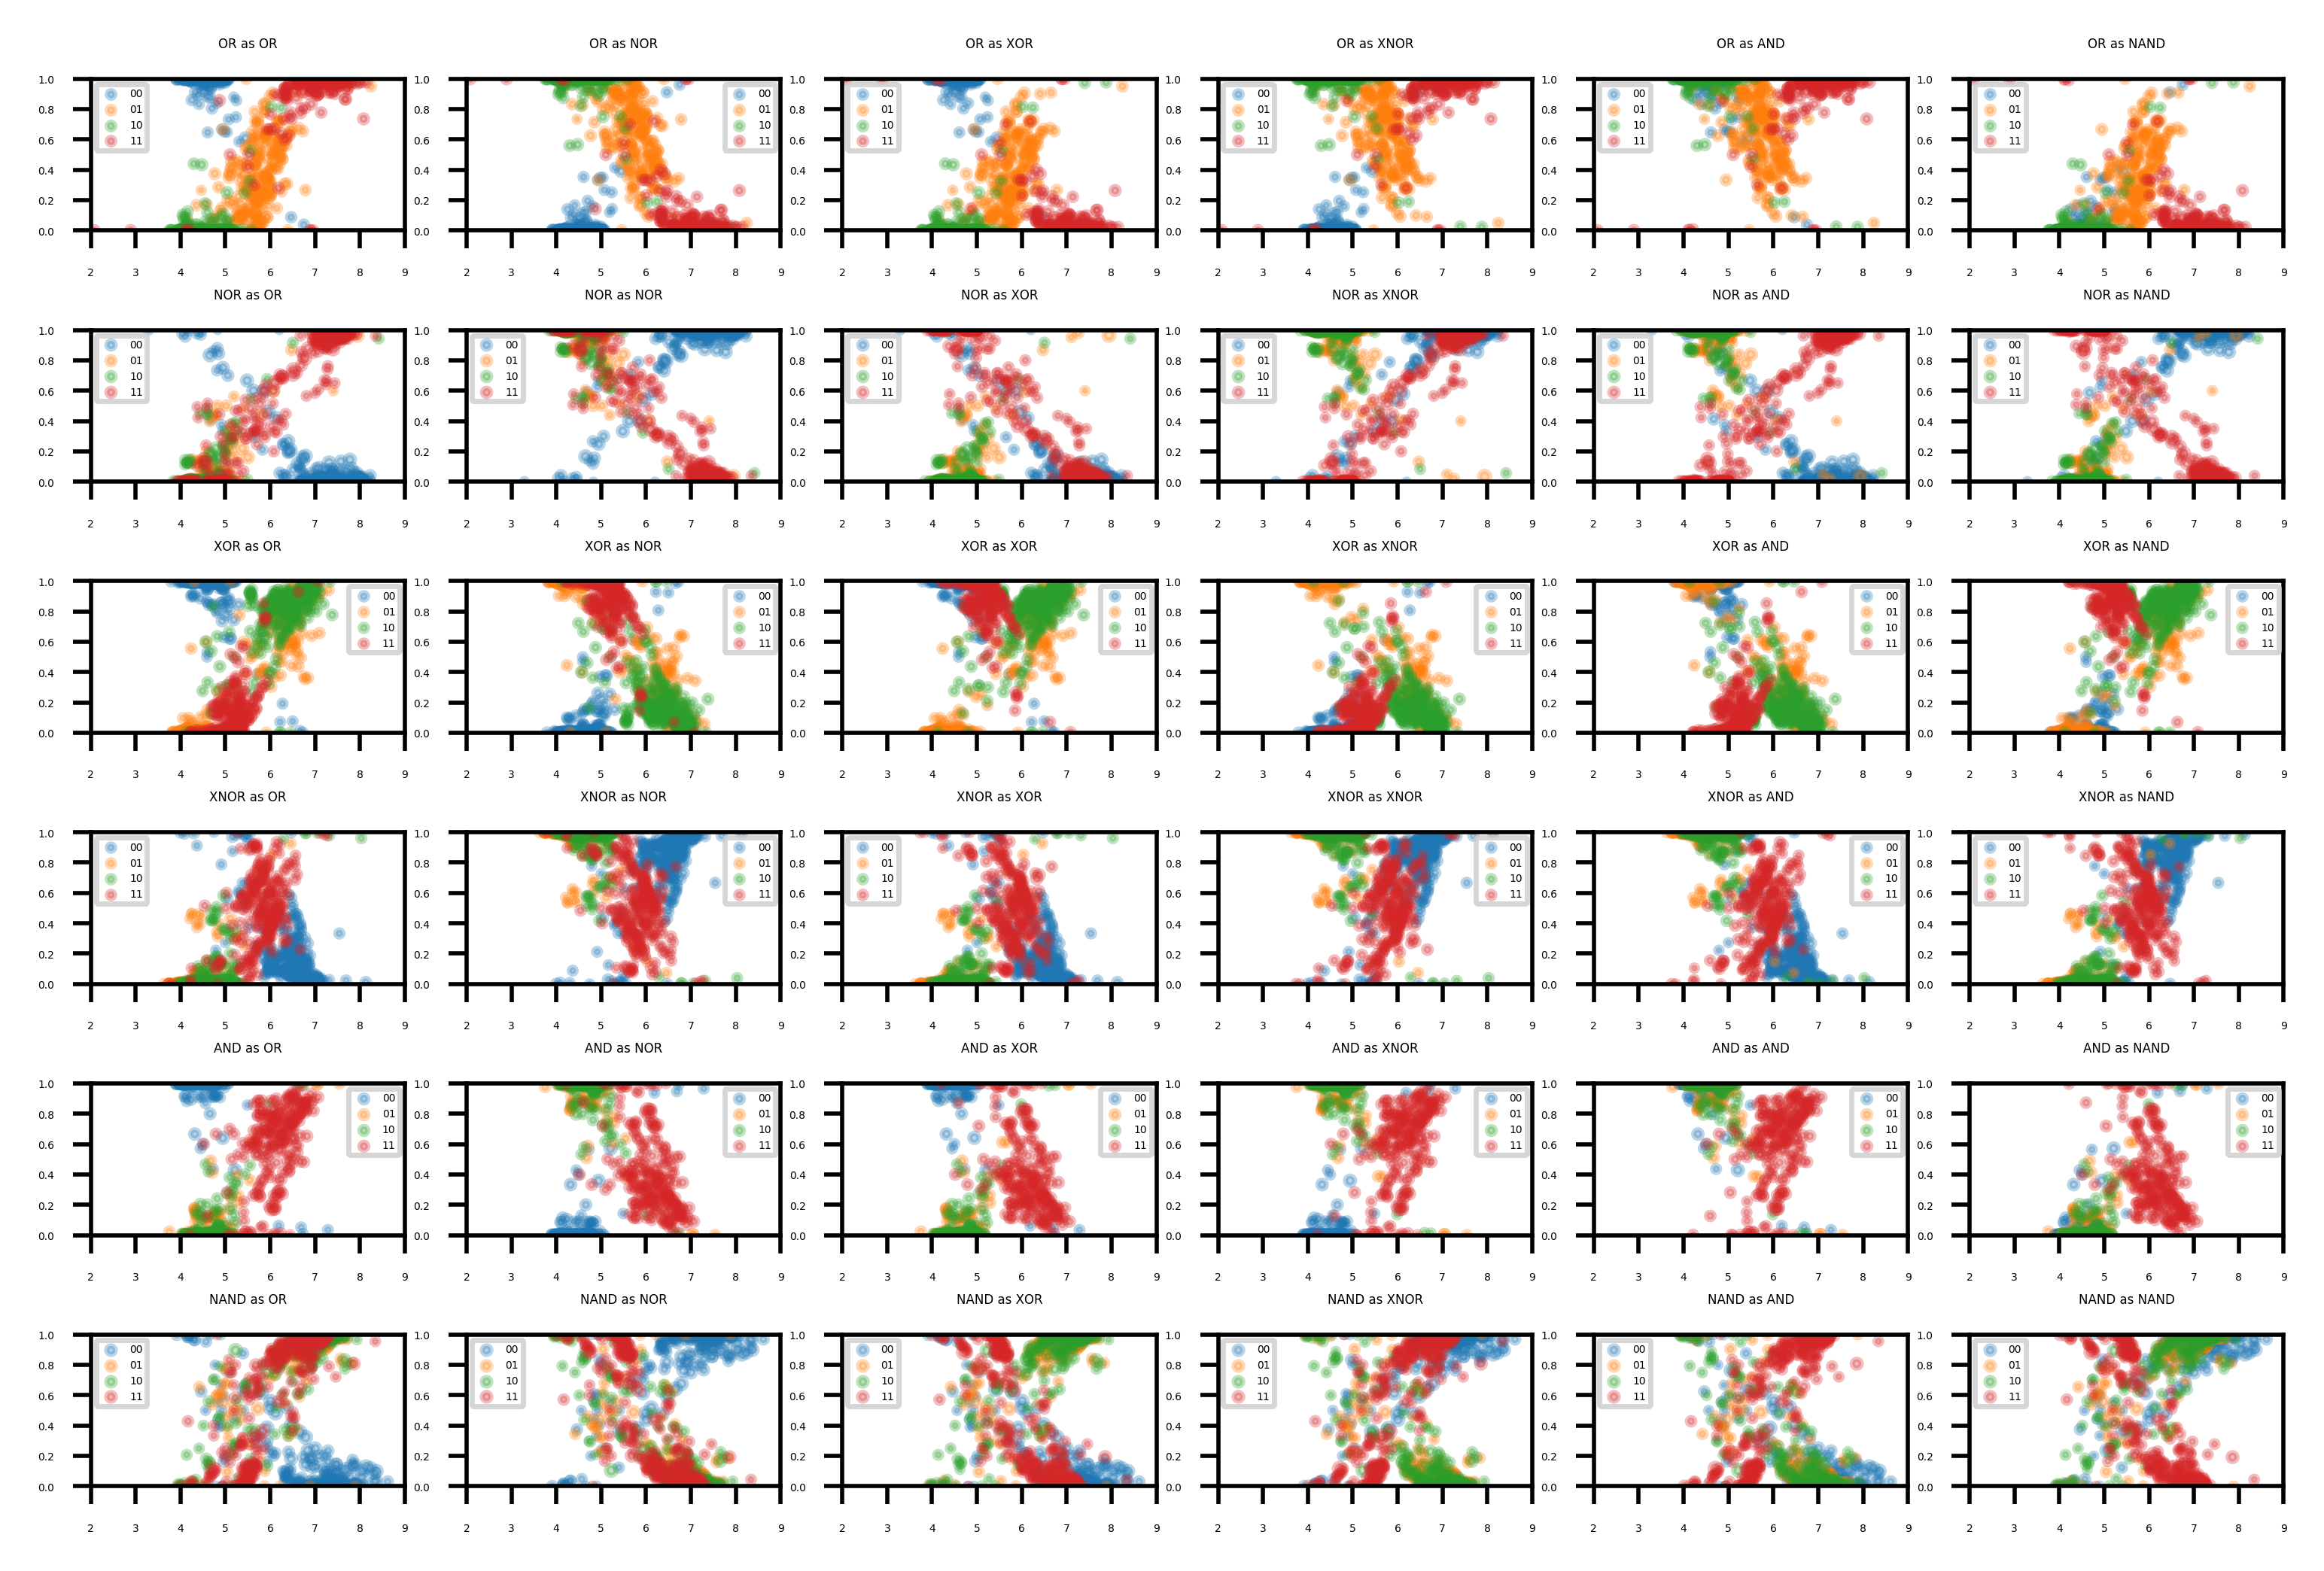

In [31]:
#fig = plt.figure()
#ax = plt.axes()

correctness='mean_correct_classifier_live'

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gates = ["OR", "NOR", "XOR", "XNOR", "AND", "NAND"]
mgates = ["OR", "NOR", "XOR", "XNOR", "AND", "NAND"]


plt.rcParams['font.size'] = 2
fig, ax = plt.subplots(nrows=len(gates), ncols=len(mgates), dpi=500)
#plt.xtics(gates)
#plt.ytics(mgates)


for i, row in enumerate(ax):
    for j, col in enumerate(row):

        mdf = df.loc[(df['gate'] == gates[i])  ]
        zz_df = mdf.loc[mdf['input'] == '00']
        zo_df = mdf.loc[mdf['input'] == '01']
        oz_df = mdf.loc[mdf['input'] == '10']
        oo_df = mdf.loc[mdf['input'] == '11']

        zz_df.loc[:,'size'] = zz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
        zo_df.loc[:,'size'] = zo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
        oz_df.loc[:,'size'] = oz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
        oo_df.loc[:,'size'] = oo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)




        col.scatter(zz_df['mean_log_gfp_live'],zz_df[get_correctness_column('00', mgates[j])], label="00", alpha=0.3, s=zz_df['size'])
        col.scatter(zo_df['mean_log_gfp_live'],zo_df[get_correctness_column('01', mgates[j])], label="01", alpha=0.3, s=zz_df['size'])
        col.scatter(oz_df['mean_log_gfp_live'],oz_df[get_correctness_column('10', mgates[j])], label="10", alpha=0.3, s=zz_df['size'])
        col.scatter(oo_df['mean_log_gfp_live'],oo_df[get_correctness_column('11', mgates[j])], label="11", alpha=0.3, s=zz_df['size'])
        col.set_title(gates[i] + " as " + mgates[j])
        col.set_xlim([2,9])
        col.set_ylim([0,1])
        col.legend()
        #col.set_xlabel("log GFP")
        #col.set_ylabel("Corr.")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
#ax.legend()
#plt.xlabel("log GFP")
#plt.ylabel("Correctness")
#plt.title("Correctness of " + gate + " as if it were " + mgate)

In [30]:
dfs = df#.sample(frac=0.01, axis=0)
dfs

count  count_live                                                                                                                                        filename  gate  growth_media_1  growth_media_2                         id  inc_temp inc_time_1  inc_time_2    index input           lab                       lab_id  mean_correct_classifier  mean_correct_classifier_live  mean_correct_high_classifier  mean_correct_high_classifier_live  mean_correct_high_threshold  mean_correct_high_threshold_live  mean_correct_low_classifier  mean_correct_low_classifier_live  mean_correct_low_threshold  mean_correct_low_threshold_live  mean_correct_threshold  mean_correct_threshold_live  mean_log_gfp  mean_log_gfp_live     media        od  od_cutoff output                 plan  plate_id  replicate source_container  std_correct_classifier  std_correct_classifier_live  std_correct_high_classifier  std_correct_high_classifier_live  std_correct_high_threshold  std_correct_high_threshold_live  std_correct_low_classifier  std_correct_low_classifier_live  std_correct_low_threshold  std_correct_low_threshold_live  std_correct_threshold  std_correct_threshold_live  std_log_gfp  std_log_gfp_live                                         strain_name  threshold  threshold_live well
0     29906.0  18901.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_A1.fcs  OR    standard_media  standard_media  2018_12_03_22_57_54_1_A1   30.0      18:hour    18.0        0        11    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.974133                 0.967010                      0.974133                      0.967010                           0.921387                     0.901540                          0.025867                     0.032990                          0.078613                    0.098460                         0.921387                0.901540                     6.770841      6.910869           SC Media  0.000750  0.1        1.0    2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.158740                0.178616                     0.158740                     0.178616                          0.005328                    0.006558                         0.158740                    0.178616                         0.001556                   0.002167                        0.001556               0.002167                    1.020506     0.966403          https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1   5.421515   5.587442        a1 
1     22004.0  21425.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_B1.fcs  OR    standard_media  standard_media  2018_12_03_22_57_54_1_B1   30.0      18:hour    18.0        30000    10    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.002467                 0.000990                      0.002467                      0.000990                           0.035085                     0.015589                          0.997533                     0.999010                          0.964915                    0.984411                         0.035085                0.015589                     3.921465      3.904025           SC Media  0.000750  0.1        1.0    2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.049605                0.031445                     0.049605                     0.031445                          0.000237                    0.000107                         0.049605                    0.031445                         0.001240                   0.000846                        0.001240               0.000846                    1.048261     1.036942          https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1   5.421515   5.587442        b1 
2     24725.0  23952.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_C1.fcs  

In [44]:
"{od%.2}".format(od=1.22222)

KeyError: 'od%'

In [47]:
#fig = plt.figure()
#ax = plt.axes()
import copy

correctness='mean_correct_classifier_live'

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gates = ["OR", "NOR", "XOR", "XNOR", "AND", "NAND"]

factors = { 'media' : ['SC Media'],
            'inc_temp' : [30.0],
            'od' : [[0, 0.0001]],
            'inc_time_2' : [8, 10] #FIXME add 12
          }
factors = { 'media' : ['SC Media','SC Slow', 'SC High Osm'],
            'inc_temp' : [30.0, 37.0],
            'od' : [[1.95e-05, 1.23e-04], [1.23e-04, 4.048e-04], [4.048e-04,8.64e-04], [8.64e-04, 0.005]],
            'inc_time_2' : [8, 10, 12, 15, 16, 18] #FIXME add 12
          }


conditions= [
    {'media' : 'SC Media', 'inc_temp' : 30.0, 'od' : [0, 0.0001]},
    {'media' : 'SC Media', 'inc_temp' : 30.0, 'od' : [0.0001, 0.0002]},

#    {'media' : 'SC Slow', 'inc_temp' : 30.0},
#    {'media' : 'SC High Osm', 'inc_temp' : 30.0},
#    {'media' : 'SC Media', 'inc_temp' : 37.0},
#    {'media' : 'SC Slow', 'inc_temp' : 37.0},
#    {'media' : 'SC High Osm', 'inc_temp' : 37.0}
            ]


def combine_conditions(factors, conditions):
    #print(factors)
    if len(factors) == 0:
        return conditions
    else:
        first_key = list(factors.keys())[0]
        values = factors.pop(first_key)
        #print(factors)
        new_conditions = []
        for condition in conditions:
            for val in values:
                new_condition = copy.deepcopy(condition)
                new_condition[first_key] = val
                new_conditions.append(new_condition)
        final_conditions = combine_conditions(factors, new_conditions)
        factors[first_key] = values
        return final_conditions

conditions = [{}]
conditions = combine_conditions(factors, conditions)
#print(conditions)
    

#plt.rcParams['font.size'] = 2
plt.figure(figsize=( len(gates), len(conditions)), dpi=300)
for i in range(len(conditions)):
    cond_df = dfs.loc[
                     (dfs['media'] == conditions[i]['media']) & \
                     (dfs['inc_temp'] == conditions[i]['inc_temp']) & \
                     (dfs['od'] >= conditions[i]['od'][0]) & \
                     (dfs['od'] < conditions[i]['od'][1]) & \
                     (dfs['inc_time_2'] == conditions[i]['inc_time_2'])
                    ]
    if len(cond_df) == 0:
        continue
        
    print(conditions[i])
    for j in range(len(gates)):
        ax = plt.subplot(len(conditions), len(gates),  i*(len(gates))+j+1)
        #print(str(i) + " " + str(j))
        #continue
        mdf = cond_df.loc[(cond_df['gate'] == gates[j])  ]
        ax.set_title(gates[j] + ": " + \
              conditions[i]['media'] + " " + \
              str(conditions[i]['inc_temp']) + " " + \
              str(conditions[i]['od'])  + " " + \
              str(conditions[i]['inc_time_2'])
             )
        ax.set_xlim([2,9])
        ax.set_ylim([0,1])


        if len(mdf) == 0:
            continue
        
        zz_df = mdf.loc[mdf['input'] == '00']
        zo_df = mdf.loc[mdf['input'] == '01']
        oz_df = mdf.loc[mdf['input'] == '10']
        oo_df = mdf.loc[mdf['input'] == '11']

        
        if(len(zz_df) > 0):
            zz_df.loc[:,'size'] = zz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            ax.scatter(zz_df['mean_log_gfp_live'],zz_df[get_correctness_column('00', gates[j])], label="00", alpha=0.3, s=zz_df['size'])
        if(len(zo_df) > 0):
            zo_df.loc[:,'size'] = zo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            ax.scatter(zo_df['mean_log_gfp_live'],zo_df[get_correctness_column('01', gates[j])], label="01", alpha=0.3, s=zo_df['size'])
        if(len(oz_df) > 0):
            oz_df.loc[:,'size'] = oz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            ax.scatter(oz_df['mean_log_gfp_live'],oz_df[get_correctness_column('10', gates[j])], label="10", alpha=0.3, s=oz_df['size'])
        if(len(oo_df) > 0):
            oo_df.loc[:,'size'] = oo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            ax.scatter(oo_df['mean_log_gfp_live'],oo_df[get_correctness_column('11', gates[j])], label="11", alpha=0.3, s=oo_df['size'])
        ax.legend()
        ax.set_xlabel("log GFP")
        ax.set_ylabel("Correctness")

    #plt.show()

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()

{'media': 'SC Media', 'inc_temp': 30.0, 'od': [1.95e-05, 0.000123], 'inc_time_2': 8}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [1.95e-05, 0.000123], 'inc_time_2': 10}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [1.95e-05, 0.000123], 'inc_time_2': 12}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [1.95e-05, 0.000123], 'inc_time_2': 15}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [1.95e-05, 0.000123], 'inc_time_2': 16}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [1.95e-05, 0.000123], 'inc_time_2': 18}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [0.000123, 0.0004048], 'inc_time_2': 8}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [0.000123, 0.0004048], 'inc_time_2': 10}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [0.000123, 0.0004048], 'inc_time_2': 12}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [0.000123, 0.0004048], 'inc_time_2': 15}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [0.000123, 0.0004048], 'inc_time_2': 16}
{'media': 'SC Media', 'inc_temp': 30.0, 'od': [0.00

/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Correctness by Input for OR')

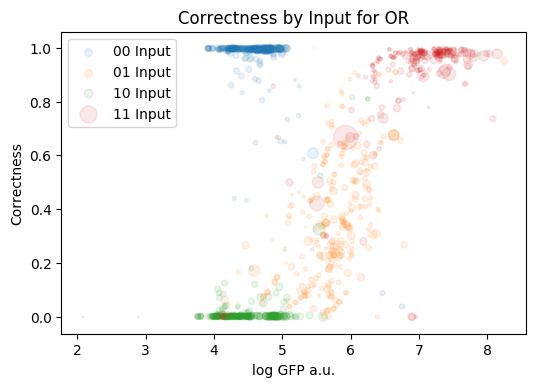

In [546]:
fig = plt.figure(dpi=100)
ax = plt.axes()

correctness='mean_correct_classifier_live'

plt.rcParams['font.size'] = 10
#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gate = "OR"

tt = {
    '00' : 1
}

mdf = df.loc[(df['gate'] == gate)  ]
zz_df = mdf.loc[mdf['input'] == '00']
zo_df = mdf.loc[mdf['input'] == '01']
oz_df = mdf.loc[mdf['input'] == '10']
oo_df = mdf.loc[mdf['input'] == '11']

zz_df.loc[:,'size'] = zz_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
zo_df.loc[:,'size'] = zo_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
oz_df.loc[:,'size'] = oz_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
oo_df.loc[:,'size'] = oo_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)





ax.scatter(zz_df['mean_log_gfp_live'],zz_df[correctness], label="00 Input", alpha=0.1, s=zz_df['size'])
ax.scatter(zo_df['mean_log_gfp_live'],zo_df[correctness], label="01 Input", alpha=0.1, s=zo_df['size'])
ax.scatter(oz_df['mean_log_gfp_live'],oz_df[correctness], label="10 Input", alpha=0.1, s=oz_df['size'])
ax.scatter(oo_df['mean_log_gfp_live'],oo_df[correctness], label="11 Input", alpha=0.1, s=oo_df['size'])

#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
ax.legend()
plt.xlabel("log GFP a.u.")
plt.ylabel("Correctness")
plt.title("Correctness by Input for " + gate )

/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Correctness by Input for OR')

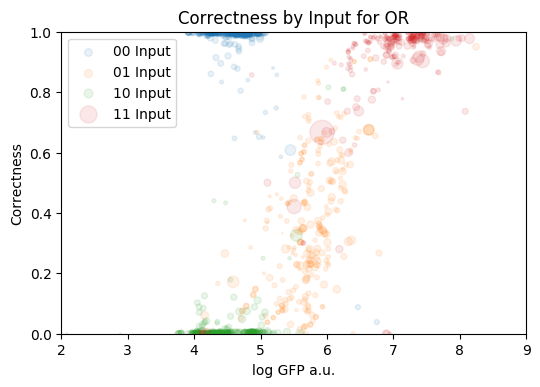

In [229]:
fig = plt.figure(dpi=100)
ax = plt.axes()

correctness='mean_correct_classifier_live'

plt.rcParams['font.size'] = 10
#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gate = "OR"

tt = {
    '00' : 1
}

mdf = df.loc[(df['gate'] == gate)  ]
zz_df = mdf.loc[mdf['input'] == '00']
zo_df = mdf.loc[mdf['input'] == '01']
oz_df = mdf.loc[mdf['input'] == '10']
oo_df = mdf.loc[mdf['input'] == '11']

zz_df.loc[:,'size'] = zz_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
zo_df.loc[:,'size'] = zo_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
oz_df.loc[:,'size'] = oz_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
oo_df.loc[:,'size'] = oo_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)

ax.set_xlim([2,9])
ax.set_ylim([0,1])


zo_df.loc[:,'od_bins'] = pd.cut(zo_df['od'], 2)
#groups = zo_df.groupby(['inc_temp', 'media', 'od_bins'])

#for i, g in groups:


ax.scatter(zz_df['mean_log_gfp_live'],zz_df[correctness], label="00 Input", alpha=0.1, s=zz_df['size'])
ax.scatter(zo_df['mean_log_gfp_live'],zo_df[correctness], label='01 Input', alpha=0.1, s=zo_df['size'])
ax.scatter(oz_df['mean_log_gfp_live'],oz_df[correctness], label="10 Input", alpha=0.1, s=oz_df['size'])
ax.scatter(oo_df['mean_log_gfp_live'],oo_df[correctness], label="11 Input", alpha=0.1, s=oo_df['size'])

#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
ax.legend()

plt.xlabel("log GFP a.u.")
plt.ylabel("Correctness")
plt.title("Correctness by Input for " + gate )

In [30]:
pd.cut(zo_df['od'], 10)

69      (0.000518, 0.00102] 
86      (1.46e-05, 0.000518]
189     (1.46e-05, 0.000518]
201     (1.46e-05, 0.000518]
211     (1.46e-05, 0.000518]
241     (1.46e-05, 0.000518]
300     (1.46e-05, 0.000518]
304     (0.000518, 0.00102] 
306     (0.000518, 0.00102] 
307     (0.000518, 0.00102] 
328     (1.46e-05, 0.000518]
330     (1.46e-05, 0.000518]
399     (0.000518, 0.00102] 
428     (1.46e-05, 0.000518]
530     (1.46e-05, 0.000518]
903     (1.46e-05, 0.000518]
935     (0.000518, 0.00102] 
948     (0.000518, 0.00102] 
984     (1.46e-05, 0.000518]
993     (1.46e-05, 0.000518]
1008    (1.46e-05, 0.000518]
1019    (1.46e-05, 0.000518]
1084    (1.46e-05, 0.000518]
1094    (0.00151, 0.00201]  
1095    (0.00201, 0.00251]  
1096    (0.000518, 0.00102] 
1099    (1.46e-05, 0.000518]
1123    (1.46e-05, 0.000518]
1145    (0.0045, 0.005]     
1156    (0.00102, 0.00151]  
               ...          
5766    (0.000518, 0.00102] 
5771    (0.000518, 0.00102] 
5779    (1.46e-05, 0.000518]
5880    (1.46e

Text(0.5, 1.0, 'Correctness by Media OR')

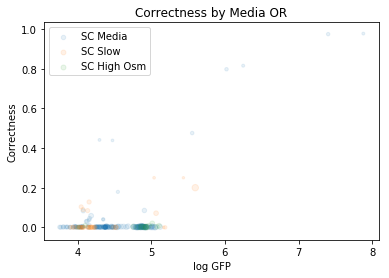

In [127]:
fig = plt.figure()
ax = plt.axes()


sdf_df = oz_df #.loc[oz['input'] == input]
for m in sdf_df.media.unique():
    ax.scatter(sdf_df.loc[sdf_df['media'] == m]['mean_log_gfp_live'],sdf_df.loc[sdf_df['media'] == m][correctness], label=m, alpha=0.1, s=sdf_df.loc[sdf_df['media'] == m]['size'])

ax.legend()

plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by Media " + gate)

Text(0.5, 1.0, 'Correctness by Media OR')

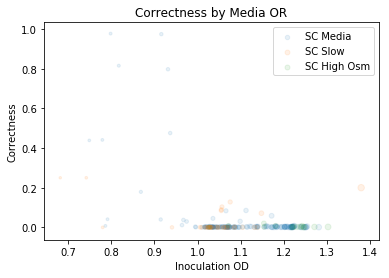

In [144]:
fig = plt.figure()
ax = plt.axes()


sdf_df = oz_df #.loc[oz['input'] == input]
for m in sdf_df.media.unique():
    ax.scatter(sdf_df.loc[sdf_df['media'] == m]['std_log_gfp_live'],sdf_df.loc[sdf_df['media'] == m][correctness], label=m, alpha=0.1, s=sdf_df.loc[sdf_df['media'] == m]['size'])

ax.legend()

plt.xlabel("Inoculation OD")
plt.ylabel("Correctness")
plt.title("Correctness by Media " + gate)

In [ ]:
import pyfpgrowth
